# 1. Your views about the problem statement?
Answer- The problem statement involves creating a Machine Learning model to predict rainfall in Sydney. The dataset contains various weather-related features, and we are given the task of using classification models, including Decision Trees and Ensemble methods, to make accurate rainfall predictions. The goal is to compare the performance of different models and select the best one based on its accuracy.

# 2. What will be your approach to solving this task?
Answer- To solve this task, we will follow these steps:

1.Load and explore the dataset: We will load the data using pandas and perform initial data exploration to understand its structure and check for any missing values or data inconsistencies.

2.Data preprocessing: We will handle any missing values, encode categorical variables if present, and perform feature scaling or normalization if required.

3.Feature selection: We will analyze the correlation between features and select the most relevant ones for our prediction task.

4.Model training: We will train multiple classification models, including Decision Trees, Random Forest, and Gradient Boosting, on the training data.

5.Model evaluation: We will use evaluation metrics like accuracy, precision, recall, and F1-score to compare the performance of each model on the test data.

6.Model selection: Based on the evaluation results, we will choose the best-performing model for rainfall prediction.



# 3. What were the available ML model options you had to perform this task?
Answer- The available ML model options for this task include: 1.Logistic Regression 2.Linear Discreminant Analysis(LDA) 3.K-Nearest_Neighbors(KNN) 4.Decision Trees 5.Random Forest (an Ensemble method) 6.Gradient Boosting (another Ensemble method) 7.Naive Bayes

# 4. Which model’s performance is best and what could be the possible reason for that?
Answer-

Based on the accuracy scores, the best-performing model is the one with the highest accuracy score:

Random Forest with Grid Search: 0.929221 The possible reason for Random Forest with Grid Search performing the best could be:

Ensemble Method: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It leverages the power of multiple decision trees and reduces the risk of overfitting, resulting in better generalization to new data.

Hyperparameter Tuning: The Grid Search process likely helped in finding the best hyperparameters for the Random Forest model, optimizing its performance.

Robust to Outliers: Random Forest is known to be less sensitive to outliers and noisy data compared to some other models, which can result in better performance on real-world datasets.

Feature Importance: Random Forest provides a measure of feature importance, which can help in understanding the significance of different features in predicting the target variable. This can lead to better feature selection and model performance.

Handling Non-Linearity: Random Forest can handle non-linear relationships between features and the target variable effectively, making it suitable for datasets with complex relationships.

# 5. What steps can you take to improve this selected model’s performance even further?
Answer- To improve the selected model's performance, we can consider the following steps:

1.Hyperparameter tuning: We can fine-tune the hyperparameters of the selected model to achieve better performance.

2.Feature engineering: We can create new features or extract more relevant information from existing features to improve the model's predictive power.

3.Data augmentation: If the dataset is limited, we can use data augmentation techniques to create additional synthetic data points for training.

4.Ensemble techniques: We can try combining multiple models using different ensemble methods to further boost accuracy.

5.Cross-validation: Perform cross-validation to ensure the model's generalization capability and avoid overfitting.

By thoroughly following these steps and experimenting with various techniques, we can iteratively improve the selected model's performance and achieve accurate rainfall predictions for Sydney.

# 1.Data Collection and Exploration

In [9]:
# Import all necessary library for data exploration.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Load the data using pandas library.
df = pd.read_excel("C:/Users/Vivek/Downloads/sydney_rain prediction (1).xlsx", header=0)

In [11]:
# Explore the first five rows of given data.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [12]:
# Get the number of rows for each column attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [13]:
# Get Extended data dictionary
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [14]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

              MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
MinTemp      1.000000  0.770893  0.012883     0.571257 -0.063154     0.052490   
MaxTemp      0.770893  1.000000 -0.140107     0.513138  0.326683    -0.187437   
Rainfall     0.012883 -0.140107  1.000000    -0.126143 -0.308044     0.331045   
Evaporation  0.571257  0.513138 -0.126143     1.000000  0.177628    -0.399019   
Sunshine    -0.063154  0.326683 -0.308044     0.177628  1.000000    -0.490967   
Humidity9am  0.052490 -0.187437  0.331045    -0.399019 -0.490967     1.000000   
Humidity3pm  0.271686 -0.152615  0.301681    -0.103246 -0.585736     0.659194   
Pressure9am -0.393827 -0.389088 -0.037051    -0.349421 -0.046654     0.263977   
Pressure3pm -0.356406 -0.425169  0.003216    -0.303330 -0.094841     0.252360   
Cloud9am     0.260508 -0.095859  0.277427    -0.041160 -0.734302     0.459455   
Cloud3pm     0.180094 -0.108426  0.229576    -0.041205 -0.751838     0.359910   
Temp9am      0.939116  0.859

In [15]:
# Get the missing values details in each column attribute
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

# 2.Data processing

In [16]:
# Missing value imputation for each variable wherever required.
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.median())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.median())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.median())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.median())
df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.median())
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.median())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.median())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.median())
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.median())

In [17]:
# Check whether missing values imputation done or not.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3331 non-null   object  

# Outlier Treatment


In [18]:

# Get the EDD for given data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3337,2012-10-16 01:24:34.737788672,2008-02-01 00:00:00,2010-05-15 00:00:00,2012-09-28 00:00:00,2015-03-14 00:00:00,2017-06-25 00:00:00,NaN
MinTemp,3337.0,14.865057,4.3,11.0,14.9,18.7,27.6,4.551593
MaxTemp,3337.0,23.002339,11.7,19.6,22.8,26.0,45.8,4.49329
Rainfall,3337.0,3.330231,0.0,0.0,0.0,1.4,119.4,9.88627
Evaporation,3337.0,5.18151,0.0,3.2,4.8,7.0,18.4,2.756505
Sunshine,3337.0,7.179374,0.0,4.3,8.2,10.2,13.6,3.801737
Humidity9am,3337.0,68.232245,19.0,58.0,69.0,80.0,100.0,15.053751
Humidity3pm,3337.0,54.704225,10.0,44.0,56.0,64.0,99.0,16.261954
Pressure9am,3337.0,1018.347678,986.7,1013.8,1018.6,1023.1,1039.0,7.000519
Pressure3pm,3337.0,1016.020375,989.8,1011.3,1016.3,1020.8,1036.7,7.012189


In [19]:
# Create an object for numerical data.
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                     'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                     'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


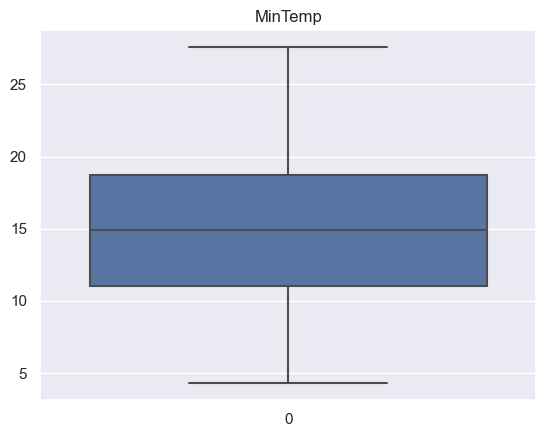

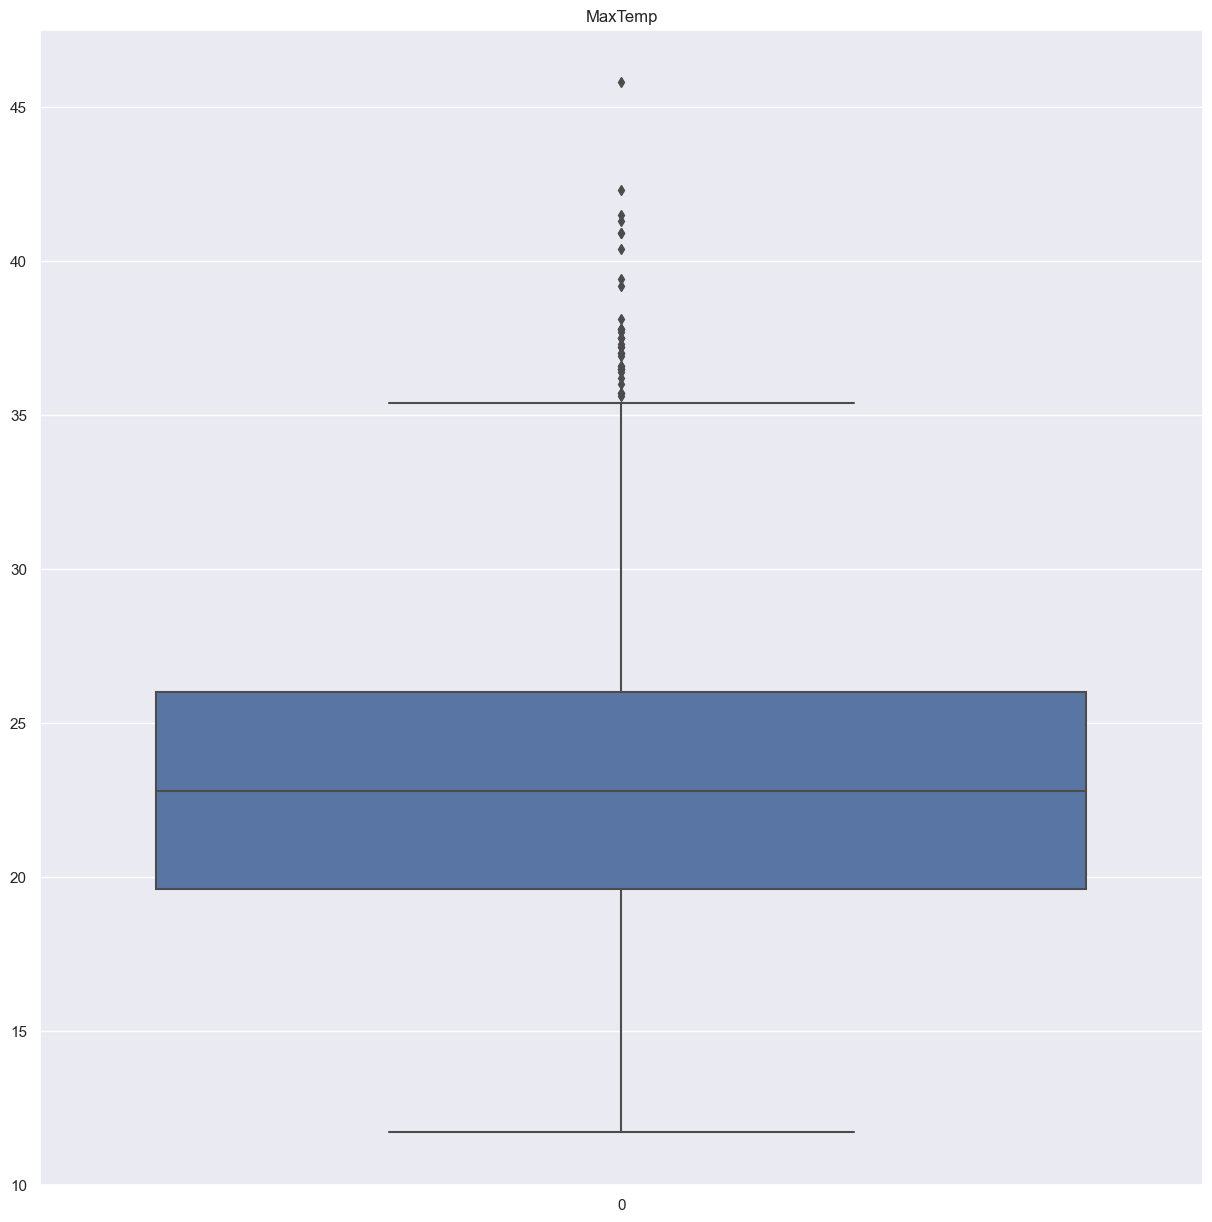

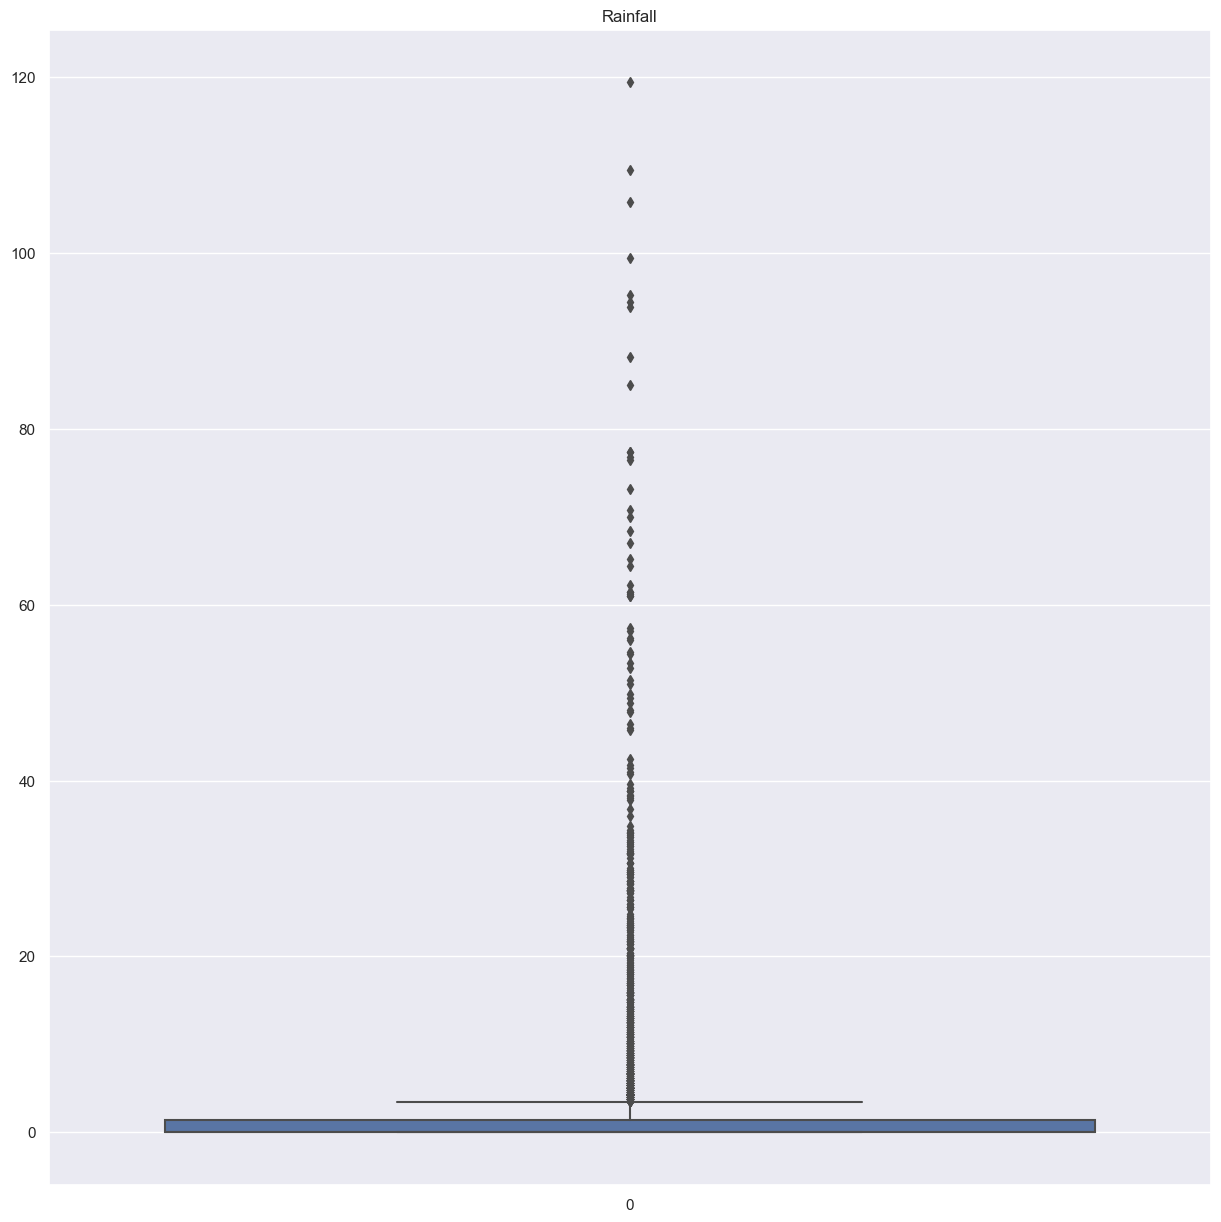

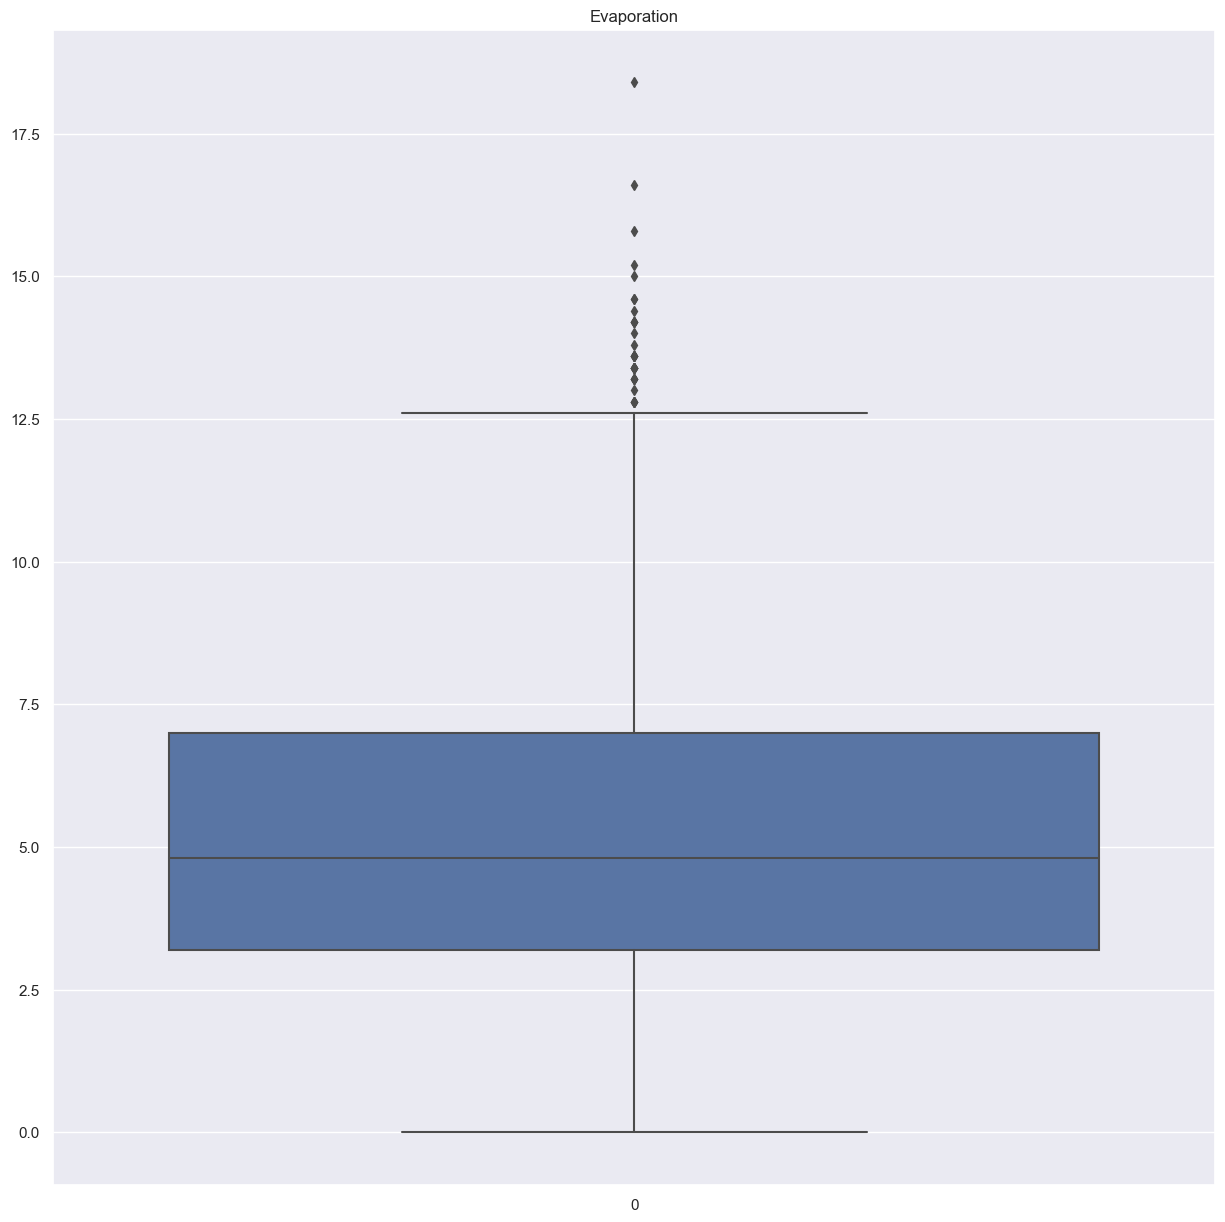

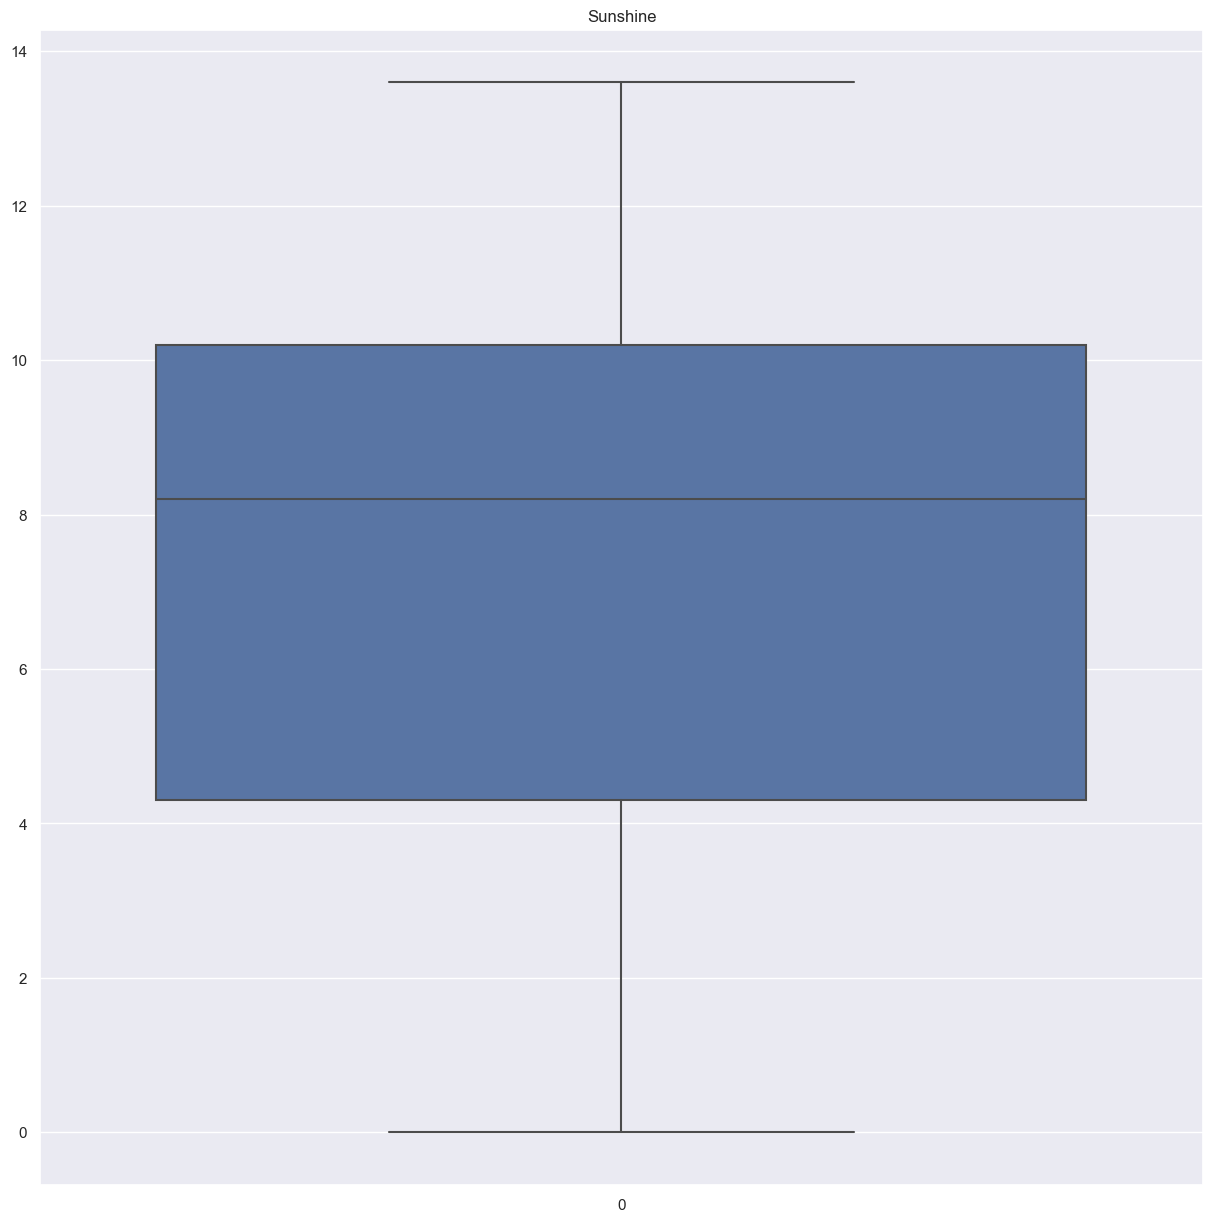

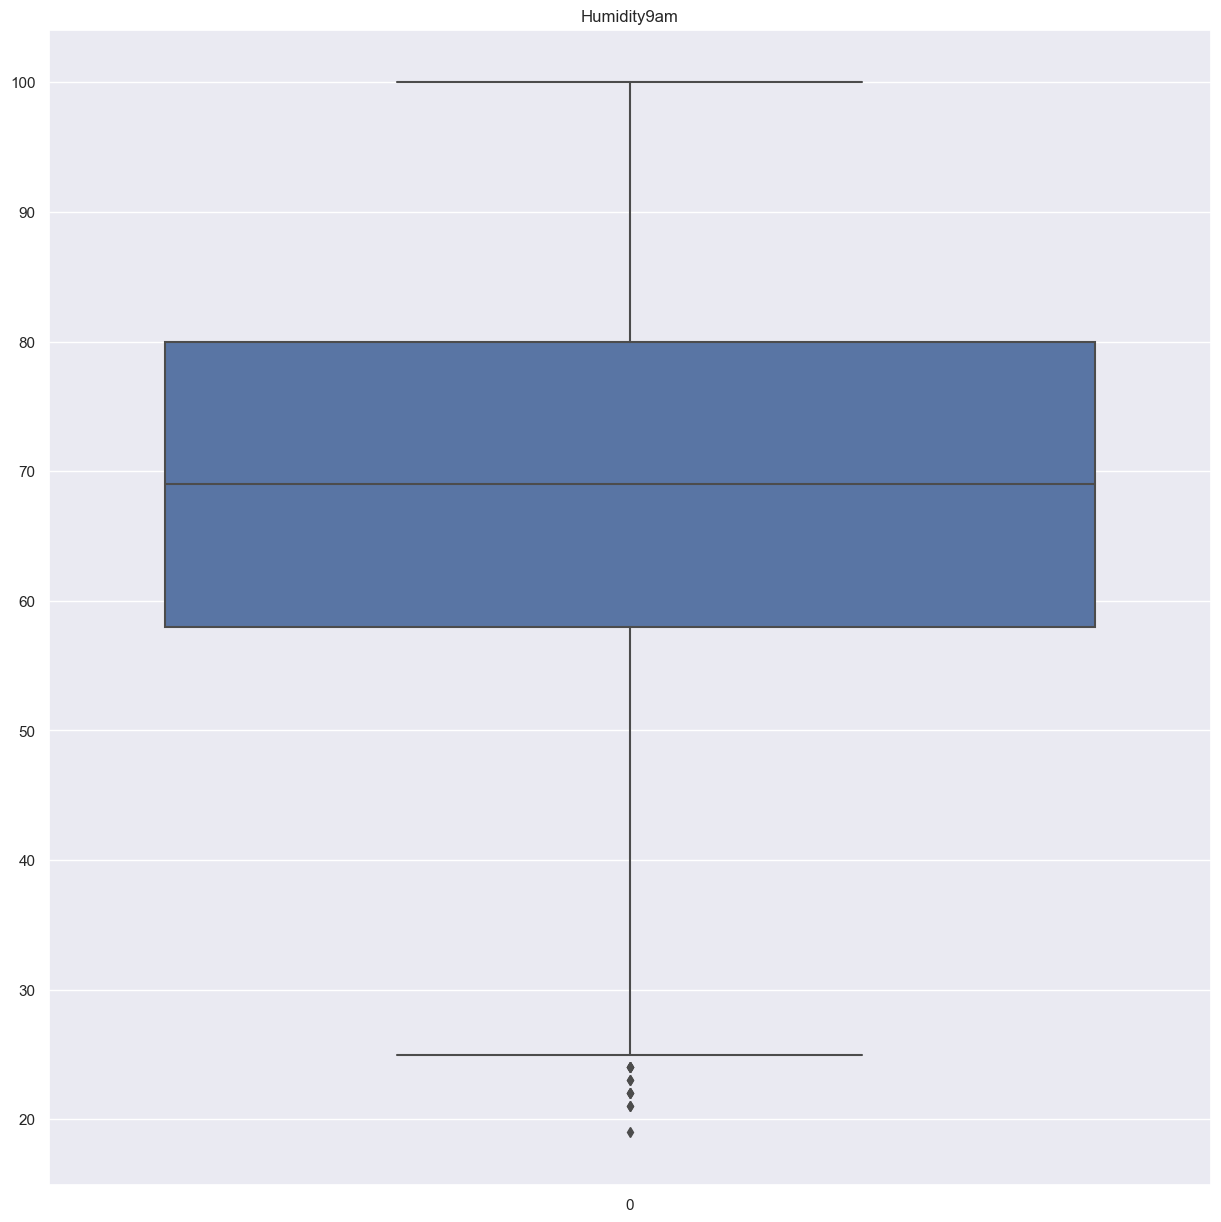

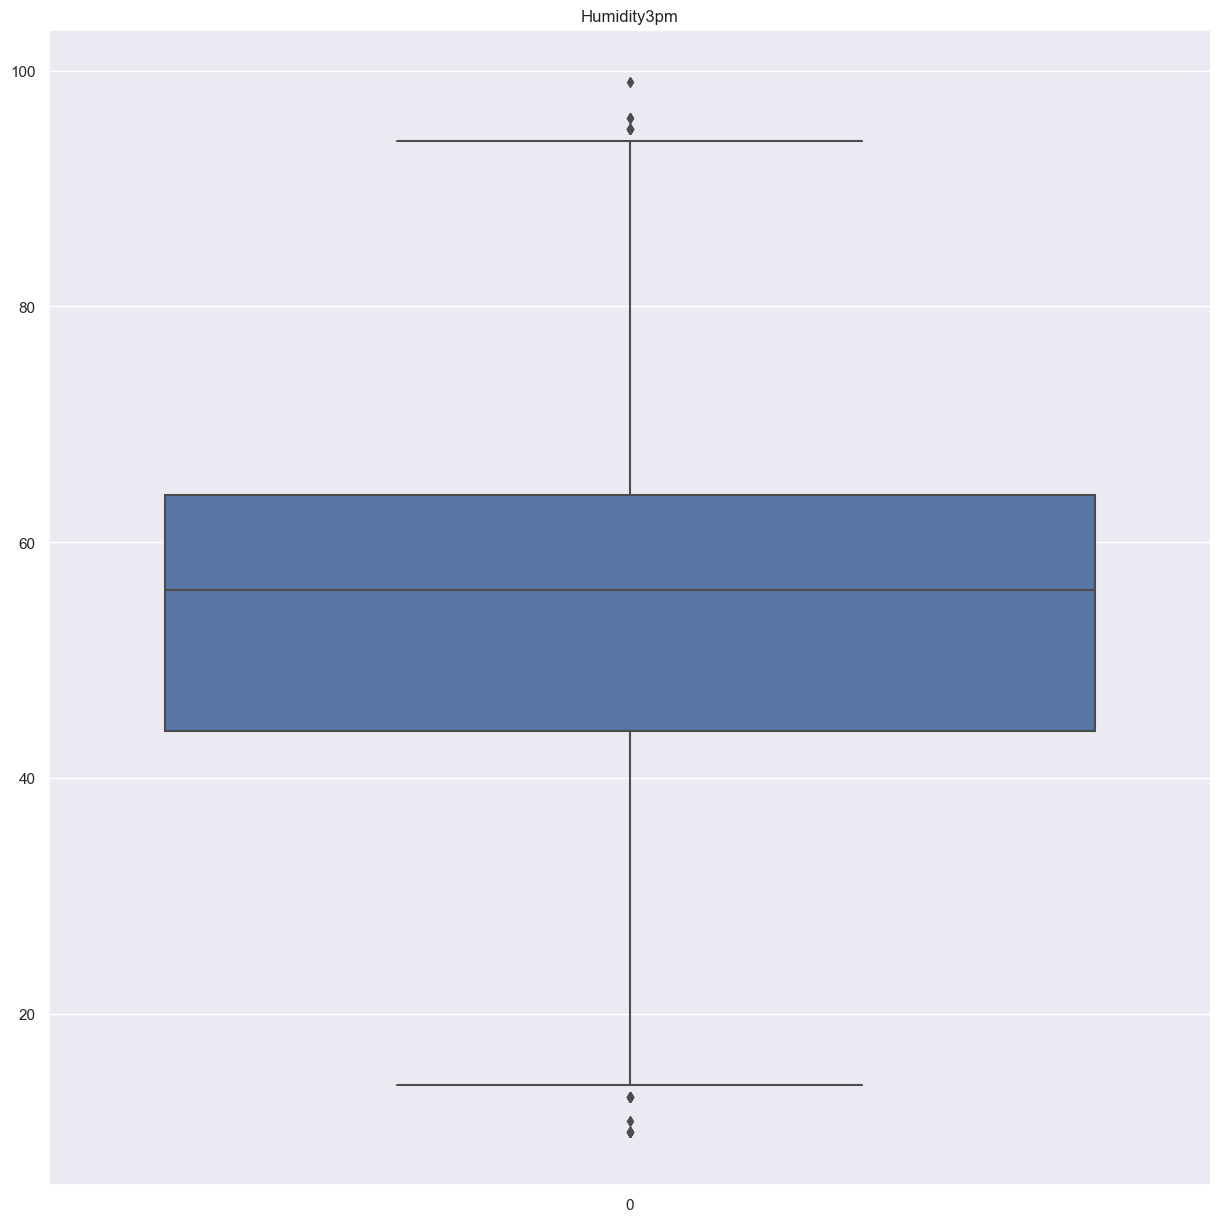

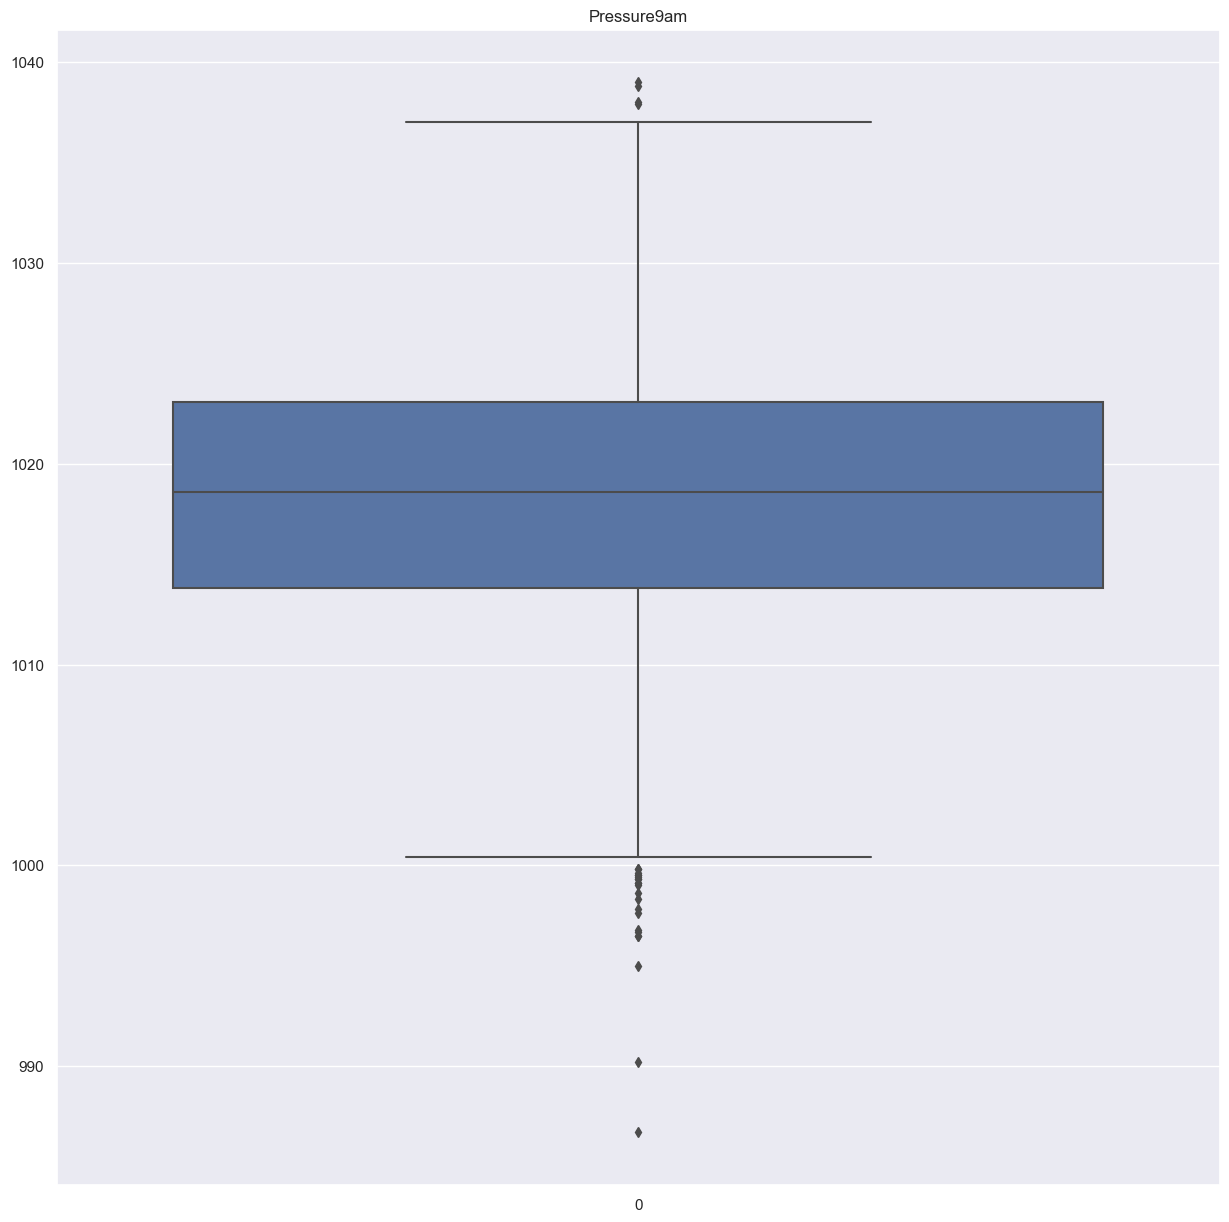

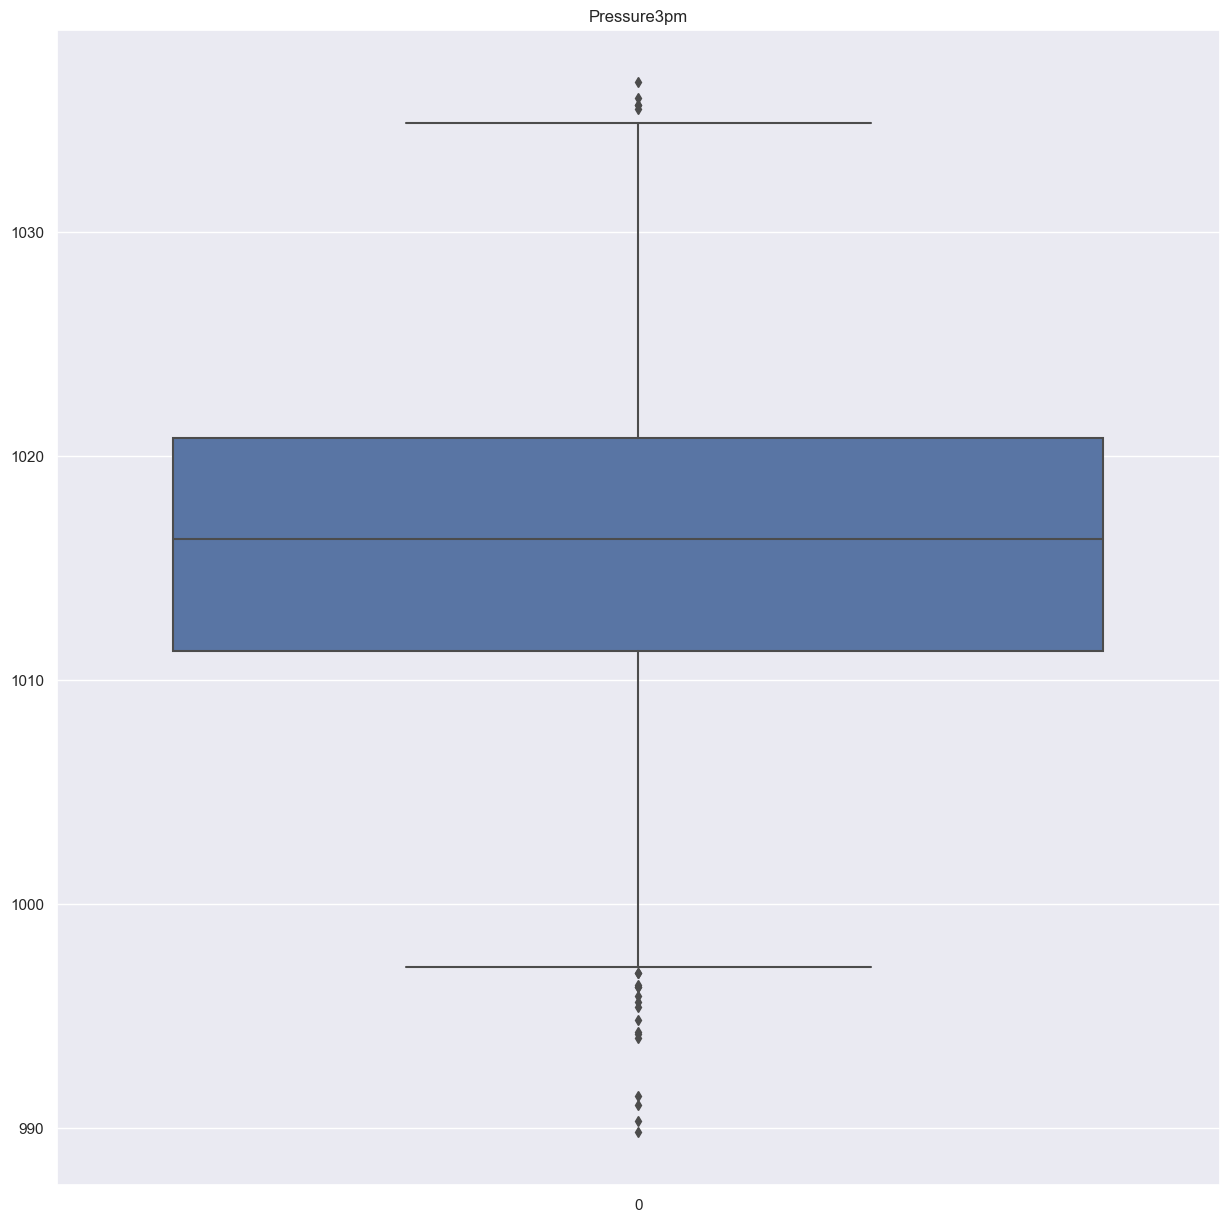

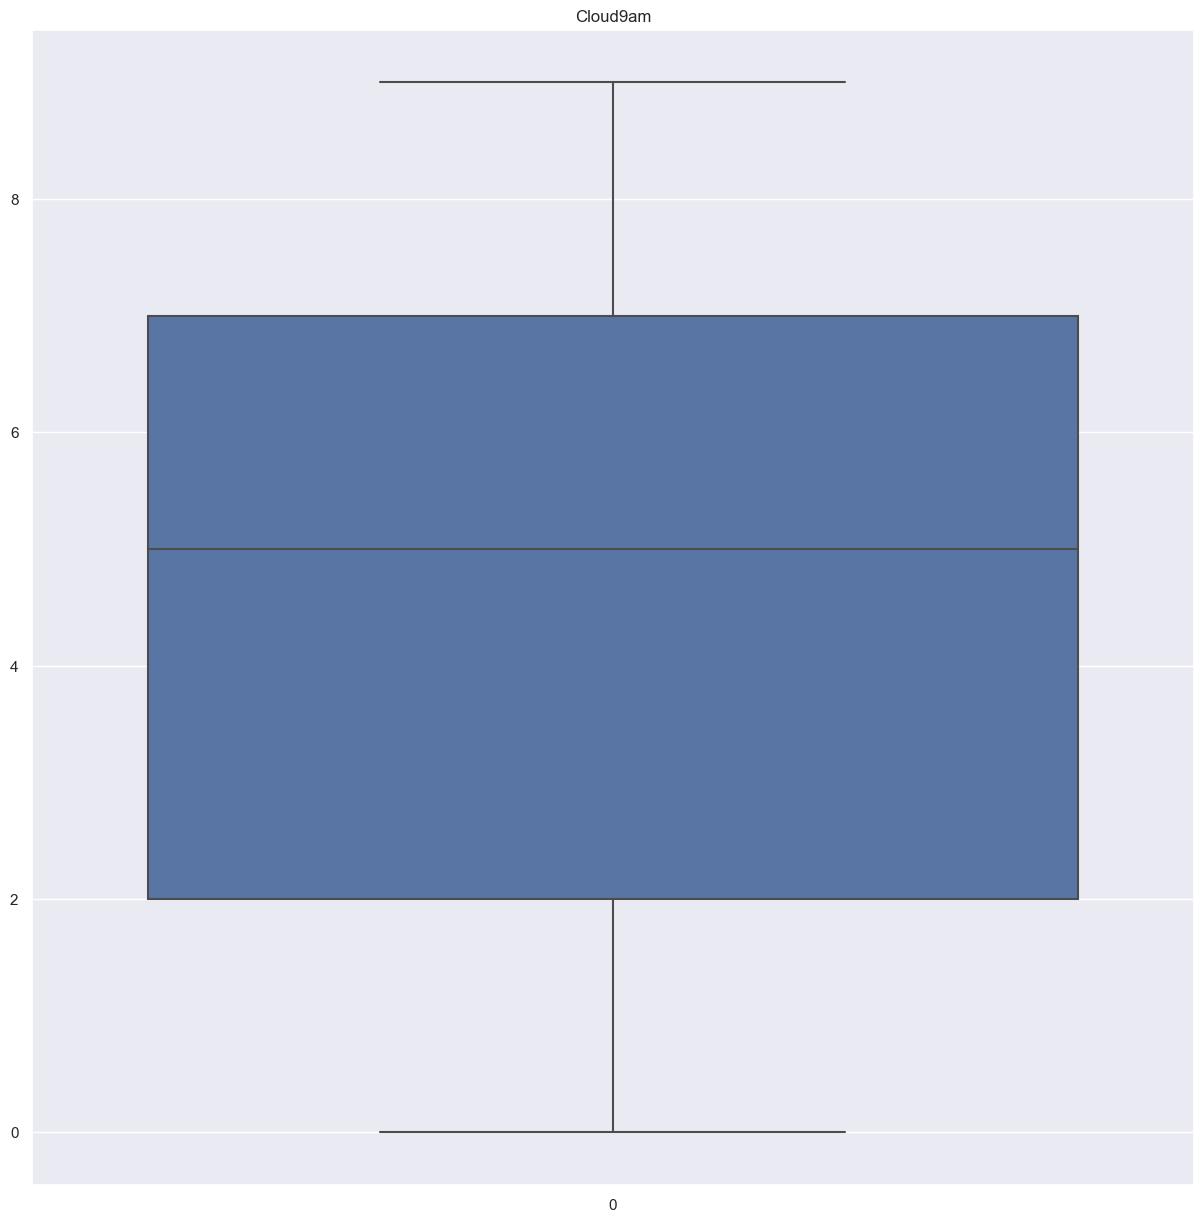

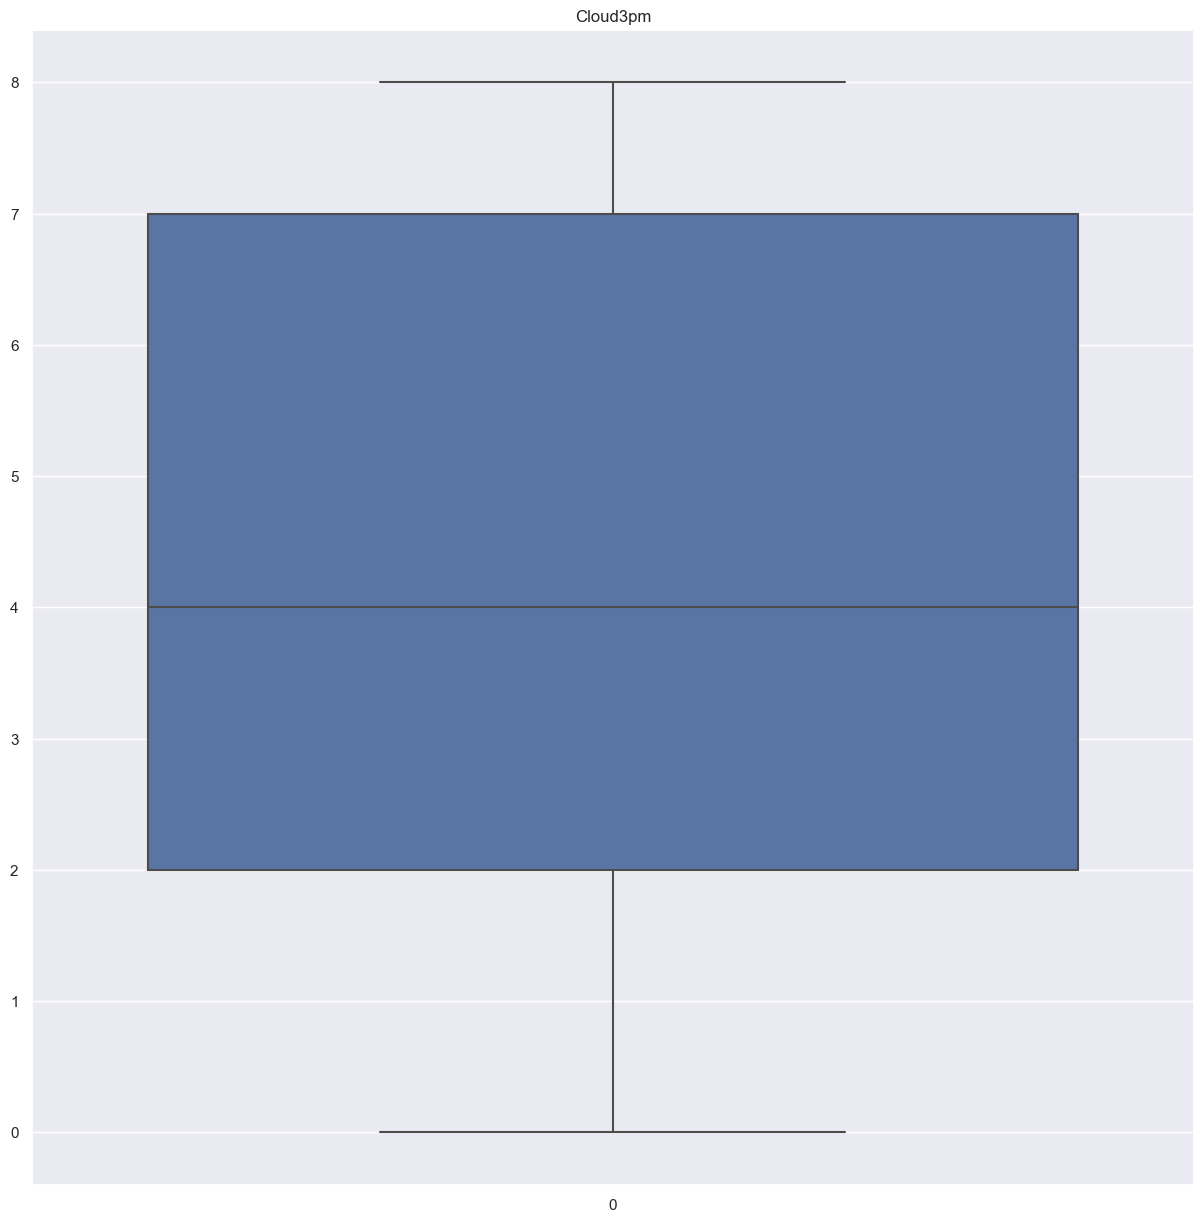

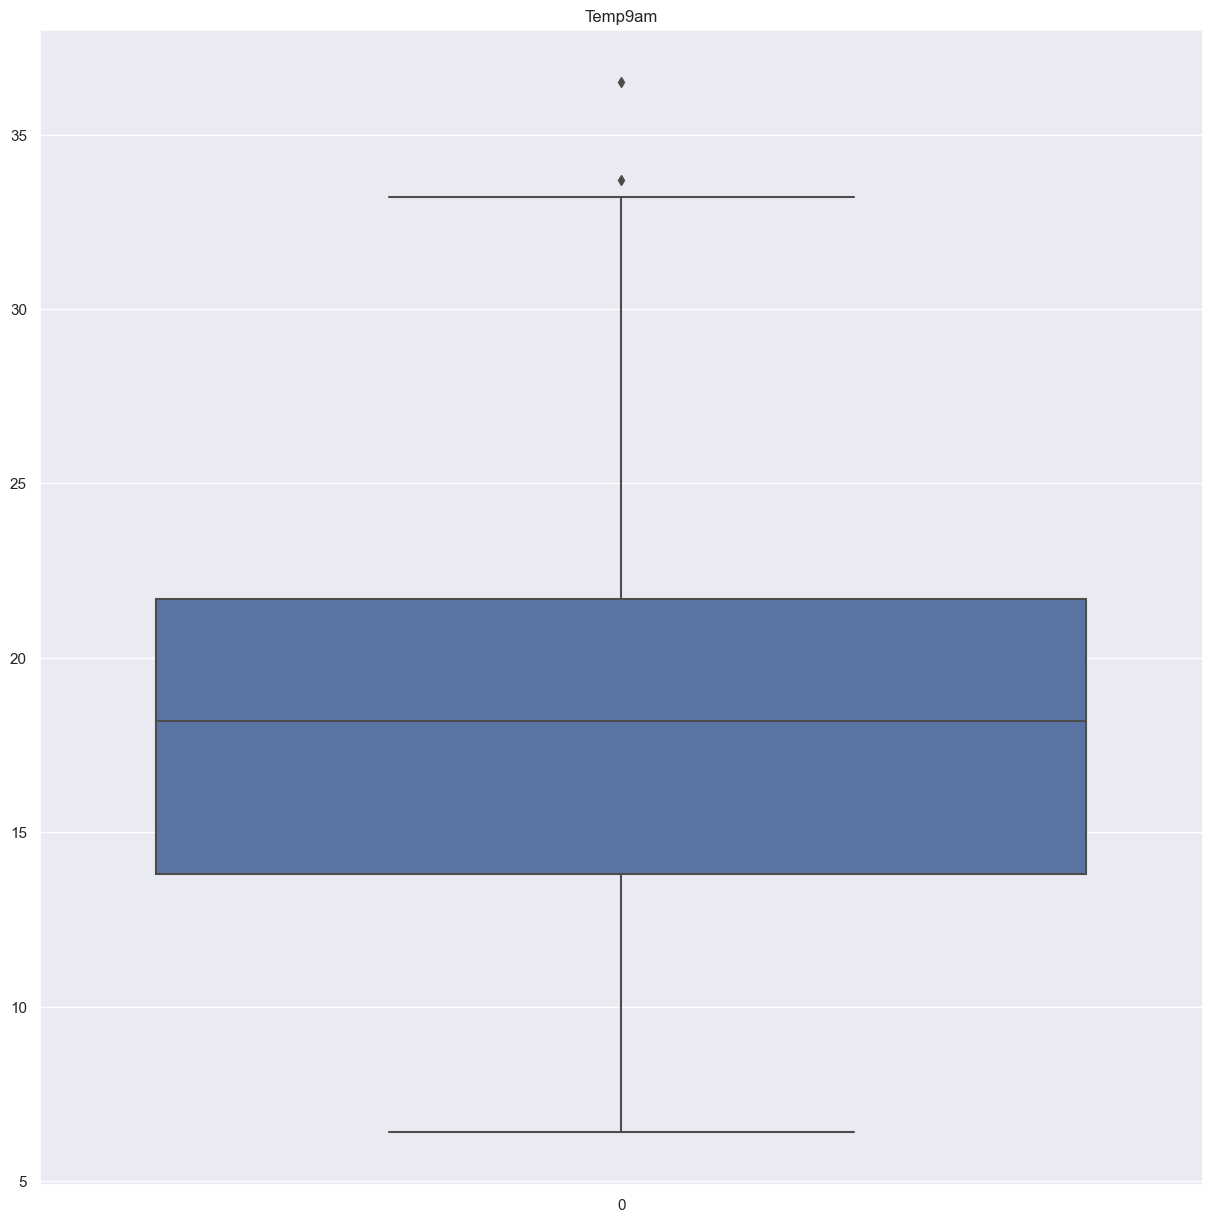

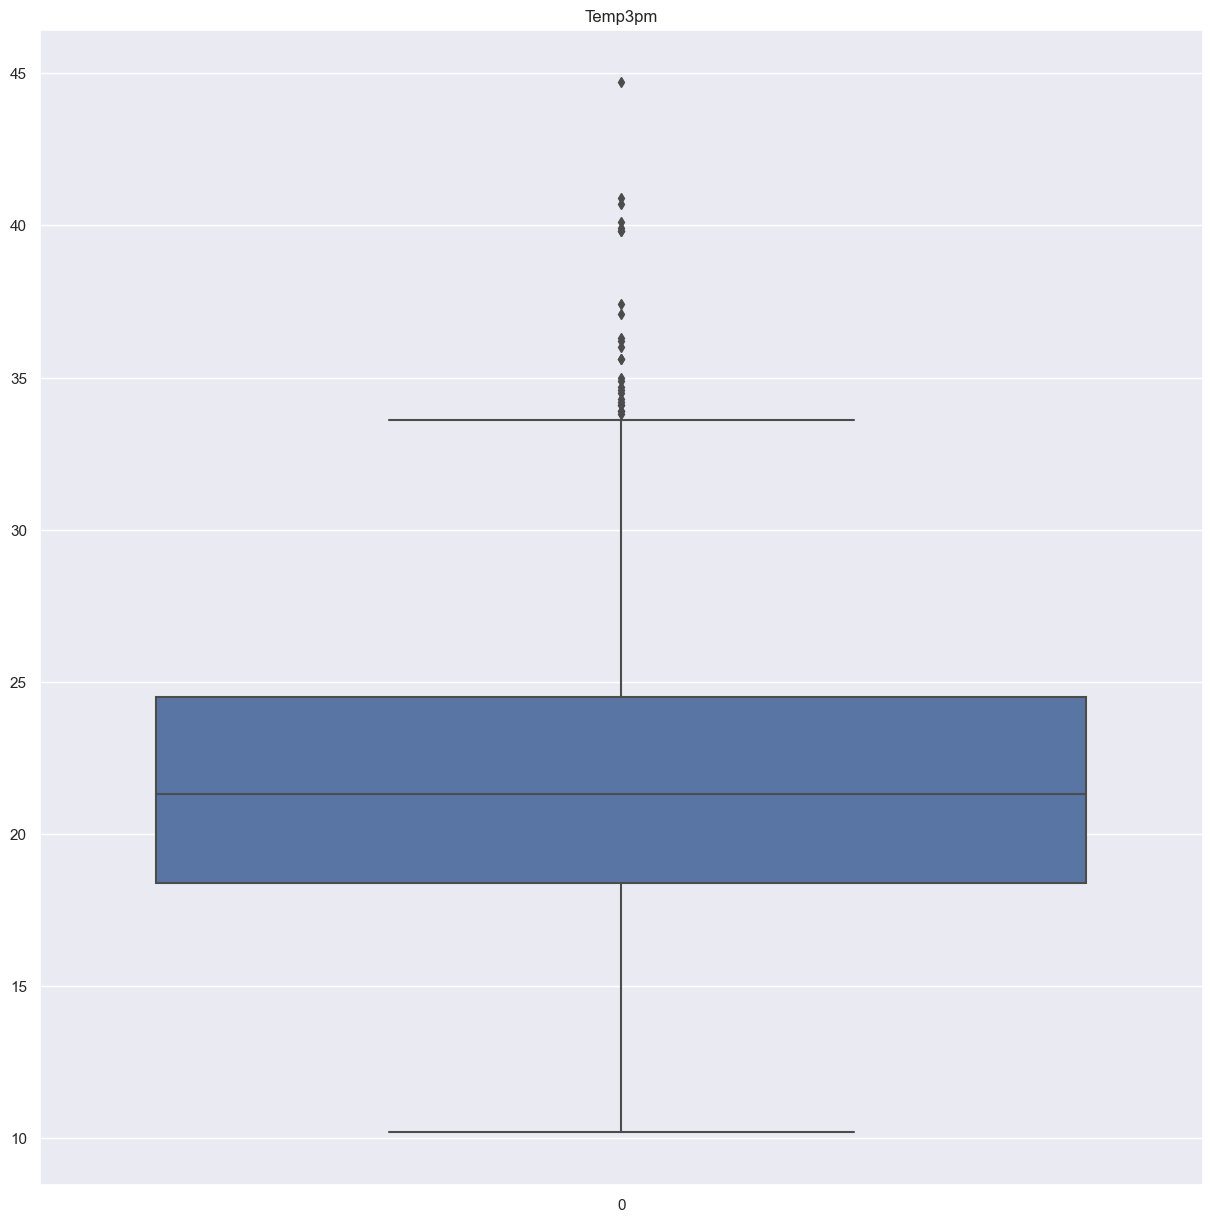

<Figure size 1500x1500 with 0 Axes>

In [20]:
# Plot the boxplot using seaborn library for outlier indentification in each column variable.
for feature in numerical_columns:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [21]:
# Find the outlier in MaxTemp column variable using IQR formula.
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_limit=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_limit=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

10.000000000000004 35.599999999999994


In [22]:
# # Clip the values of 'MaxTemp' column in the DataFrame 'df'
# Values greater than or equal to 35.5999 will be set to 35.5999
# Values less than or equal to 10 will be set to 10
df.loc[df['MaxTemp']>=35.5999,'MaxTemp']=35.5999
df.loc[df['MaxTemp']<=10,'MaxTemp']=10

In [23]:
# Find the outlier in Rainfall column variable using IQR formula.
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_limit=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_limit=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-2.0999999999999996 3.4999999999999996


In [24]:
# Clip the values of 'Rainfall' column in the DataFrame 'df'
# Values greater than or equal to 3.4999 will be set to 3.4999
# Values less than or equal to -2.099 will be set to -2.099
df.loc[df['Rainfall']>=3.4999,'Rainfall']=3.4999
df.loc[df['Rainfall']<=-2.099,'Rainfall']=-2.099

In [25]:
# Find the outlier in Evaporation column variable using IQR formula.
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_limit=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_limit=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)


-2.499999999999999 12.7


In [26]:
# Clip the values of 'Evaporation' column in the DataFrame 'df'
# Values greater than or equal to 12.7 will be set to 12.7
# Values less than or equal to -2.4999 will be set to -2.499
df.loc[df['Evaporation']>=12.7,'Evaporation']=12.7
df.loc[df['Evaporation']<=-2.4999,'Evaporation']=-2.499

In [27]:
# Find the outlier in Humidity9am column variable using IQR formula.
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_limit=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_limit=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

25.0 113.0


In [28]:
# Clip the values of 'Humidity9am' column in the DataFrame 'df'
# Values greater than or equal to 113 will be set to 113
# Values less than or equal to 25 will be set to 25
df.loc[df['Humidity9am']>=113,'Humidity9am']=113
df.loc[df['Humidity9am']<=25,'Humidity9am']=25


# Find the outlier in Humidity3pm column variable using IQR formula.
IQR=df.Humidity3pm.quantile(0.75)-df.Humidity3pm.quantile(0.25)
lower_limit=df.Humidity3pm.quantile(0.25)-(IQR*1.5)
upper_limit=df.Humidity3pm.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

14.0 94.0


In [29]:
# Clip the values of 'Humidity3pm' column in the DataFrame 'df'
# Values greater than or equal to 94 will be set to 94
# Values less than or equal to 14 will be set to 14
df.loc[df['Humidity3pm']>=94,'Humidity3pm']=94
df.loc[df['Humidity3pm']<=14,'Humidity3pm']=14


In [30]:
# Find the outlier in Pressure9am column variable using IQR formula.
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_limit=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_limit=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

999.8499999999999 1037.0500000000002


In [31]:
# Clip the values of 'Pressure9am' column in the DataFrame 'df'
# Values greater than or equal to 1037.05 will be set to 1037.05
# Values less than or equal to 999.84 will be set to 999.84
df.loc[df['Pressure9am']>=1037.05,'Pressure9am']=1037.05
df.loc[df['Pressure9am']<=999.84,'Pressure9am']=999.84


# Find the outlier in Pressure3pm column variable using IQR formula.
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_limit=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_limit=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)


997.05 1035.05


In [32]:
# Clip the values of 'Pressure3pm' column in the DataFrame 'df'
# Values greater than or equal to 1035.05 will be set to 1035.05
# Values less than or equal to 997.05 will be set to 997.05
df.loc[df['Pressure3pm']>=1035.05,'Pressure3pm']=1035.05
df.loc[df['Pressure3pm']<=997.05,'Pressure3pm']=997.05


# Find the outlier in Temp9am column variable using IQR formula.
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_limit=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_limit=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)


1.9500000000000028 33.55


In [33]:
# Clip the values of 'Temp9am' column in the DataFrame 'df'
# Values greater than or equal to 33.55 will be set to 33.55
# Values less than or equal to 1.95 will be set to 1.95
df.loc[df['Temp9am']>=33.55,'Temp9am']=33.55
df.loc[df['Temp9am']<=1.95,'Temp9am']=1.95


# Find the outlier in Temp3pm column variable using IQR formula.
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_limit=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_limit=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

9.249999999999996 33.650000000000006


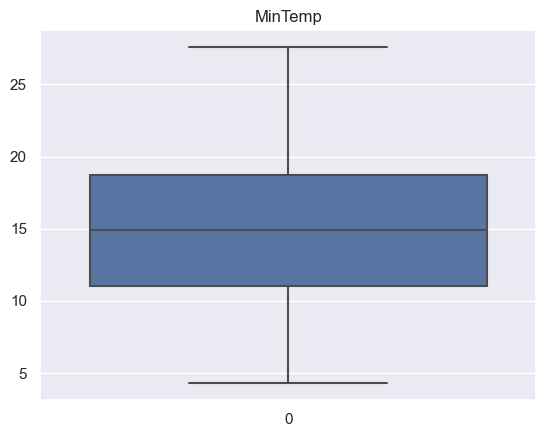

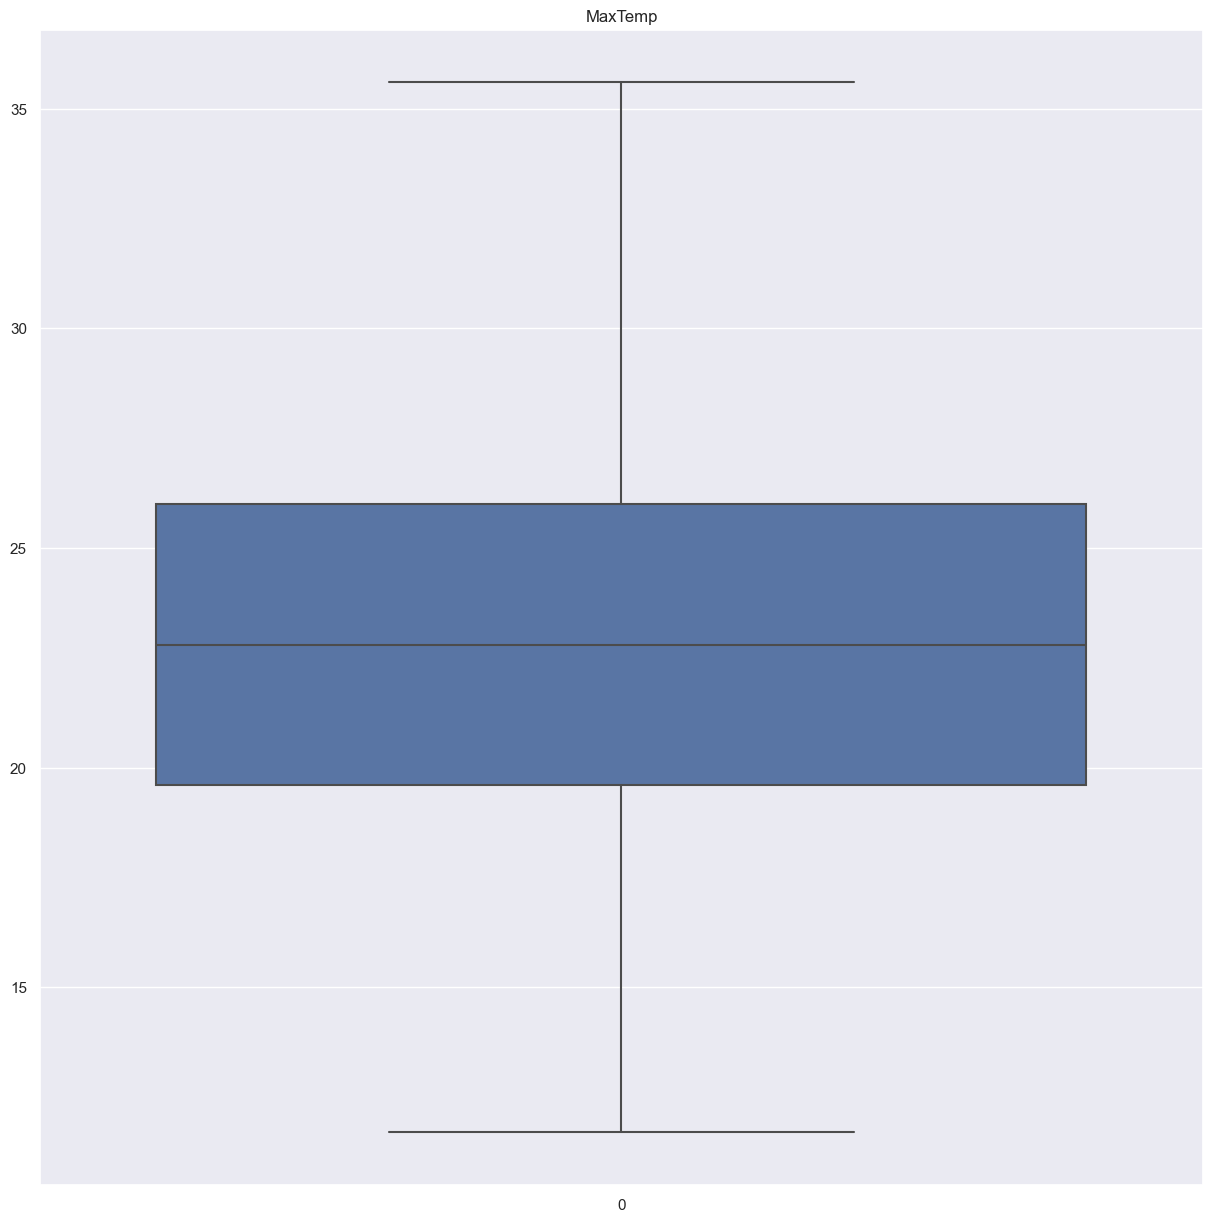

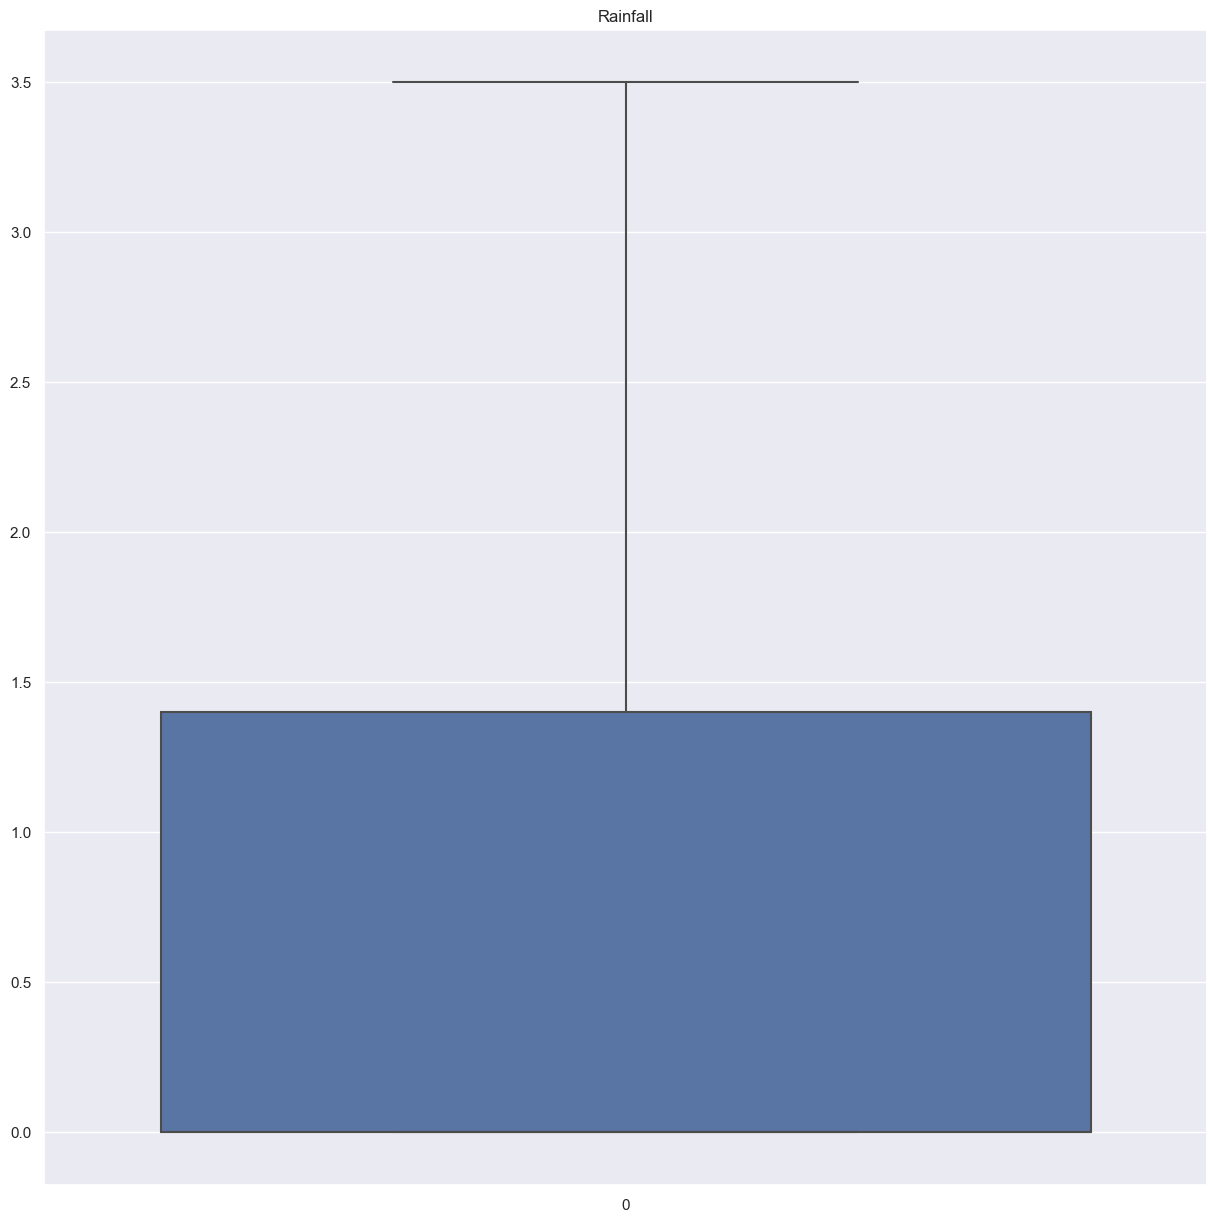

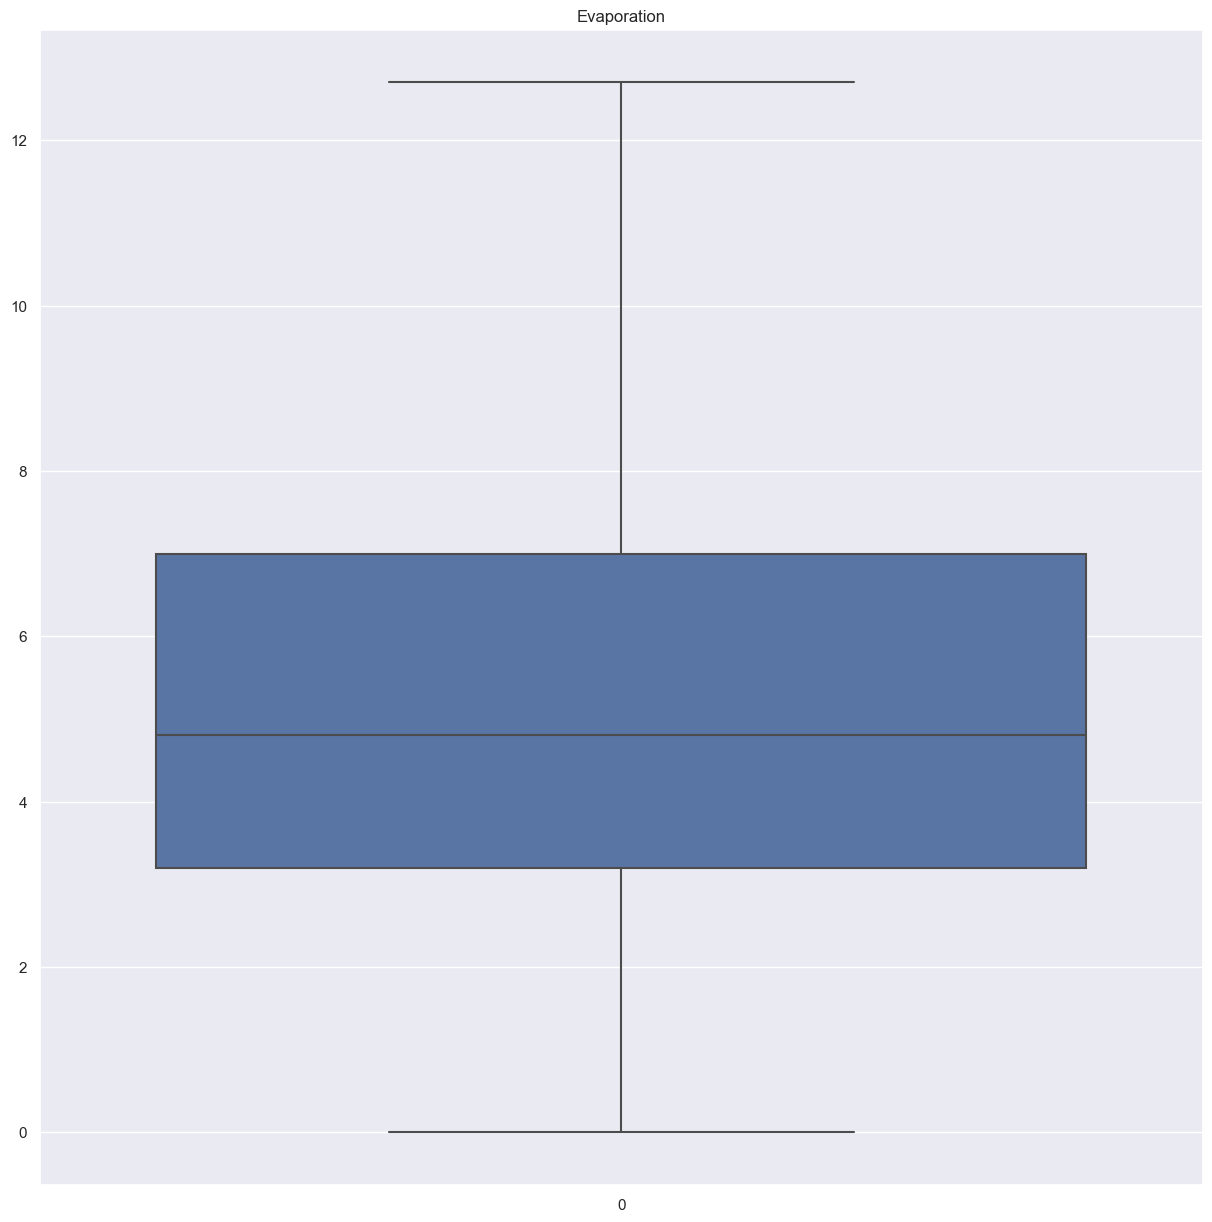

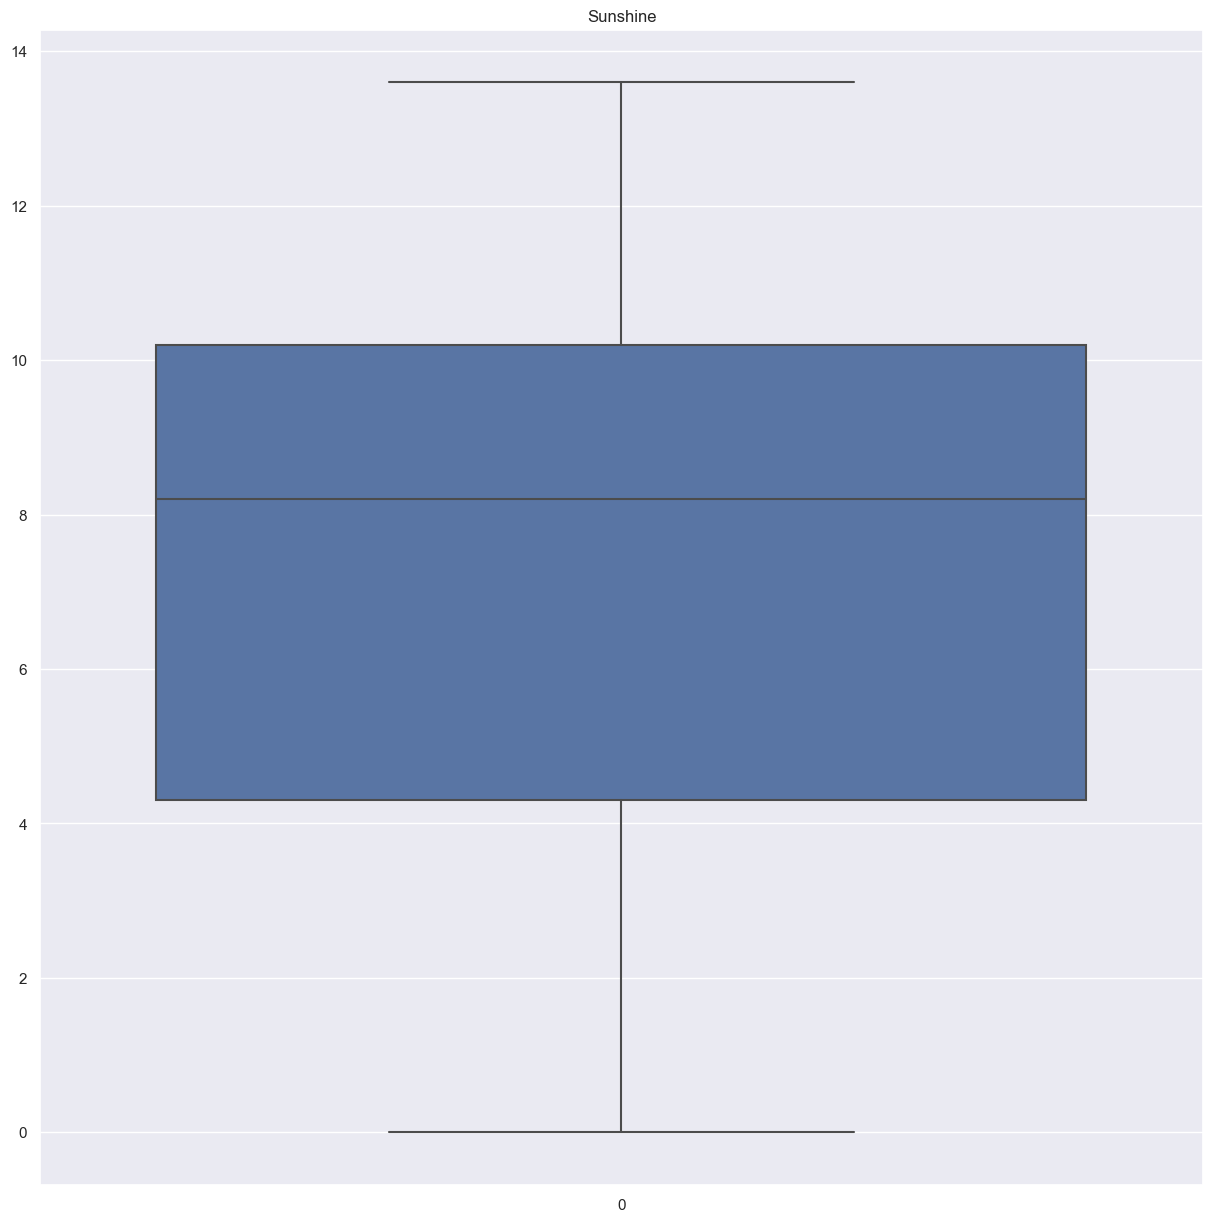

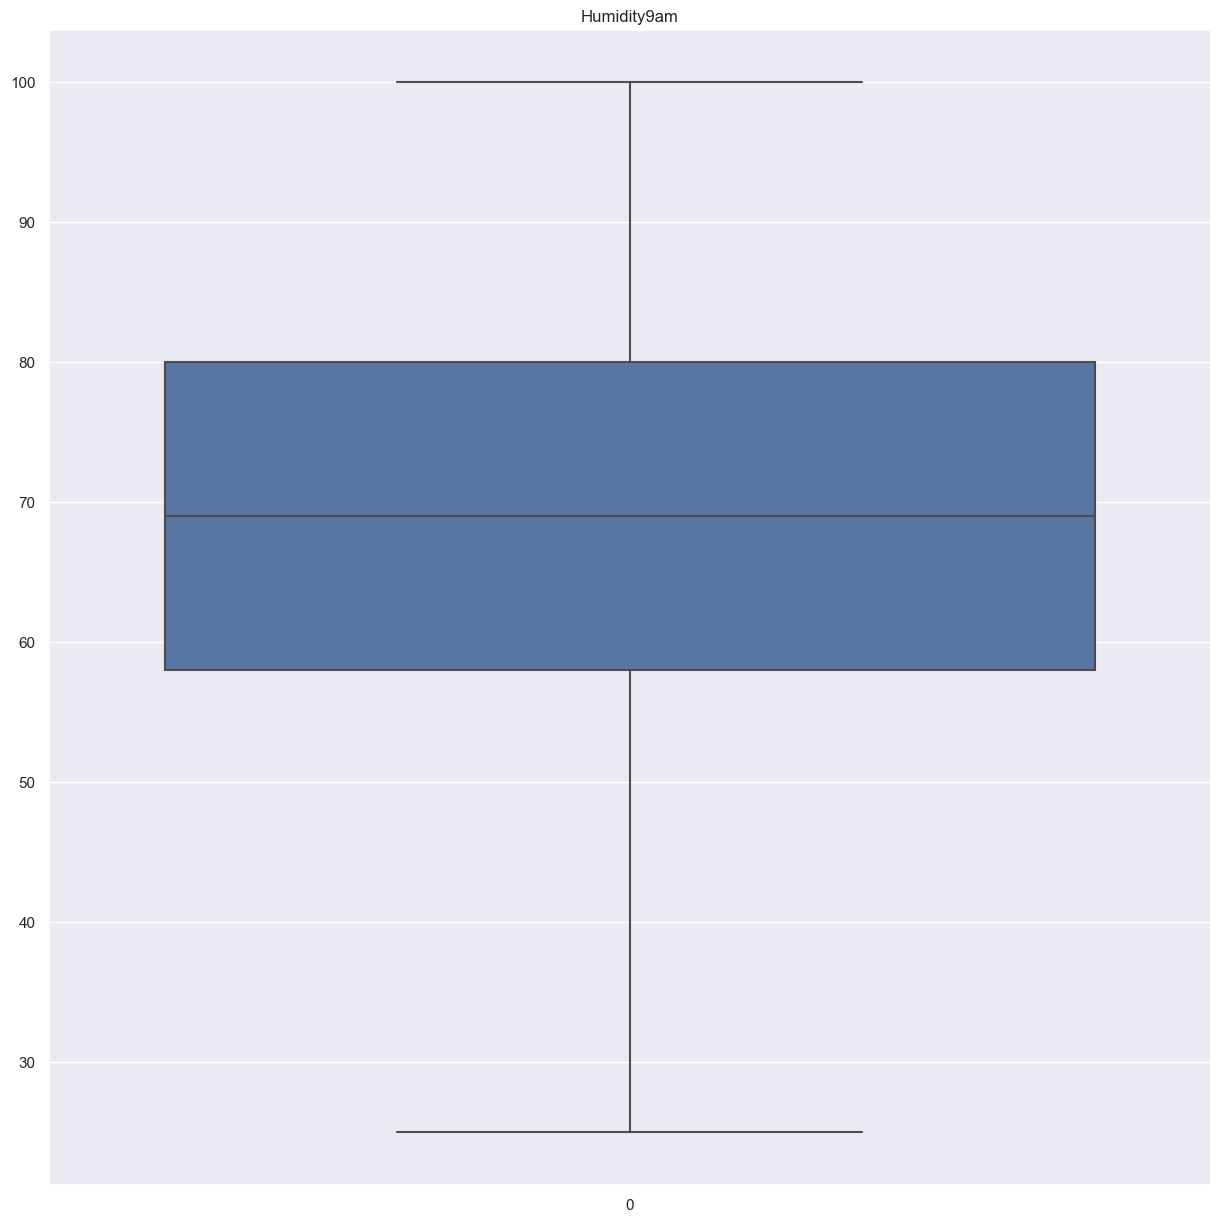

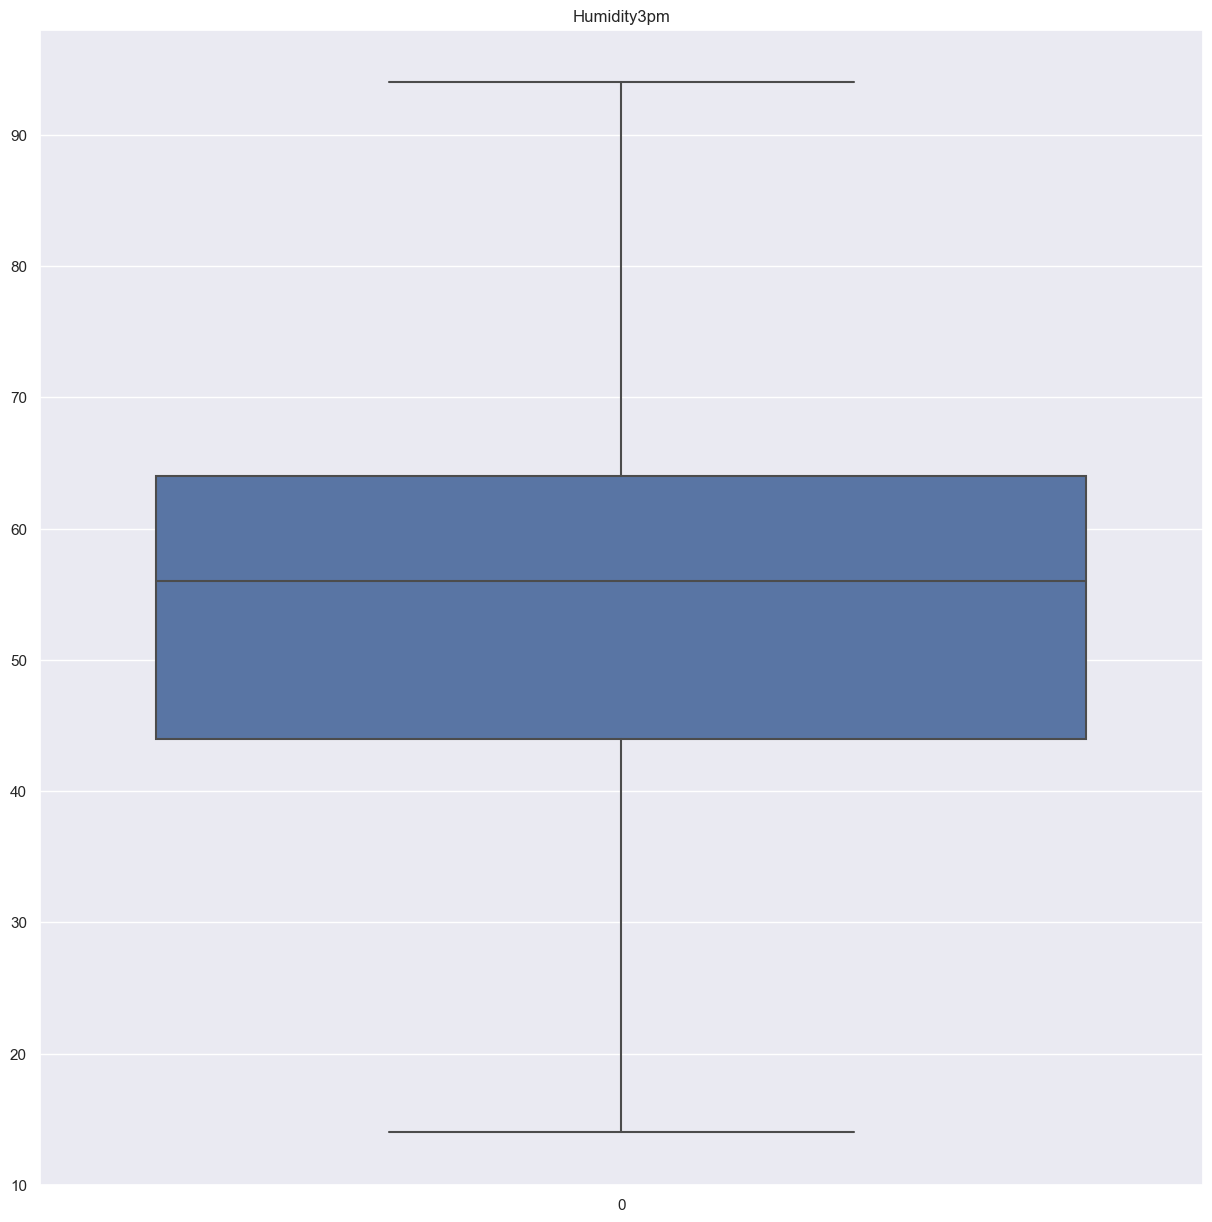

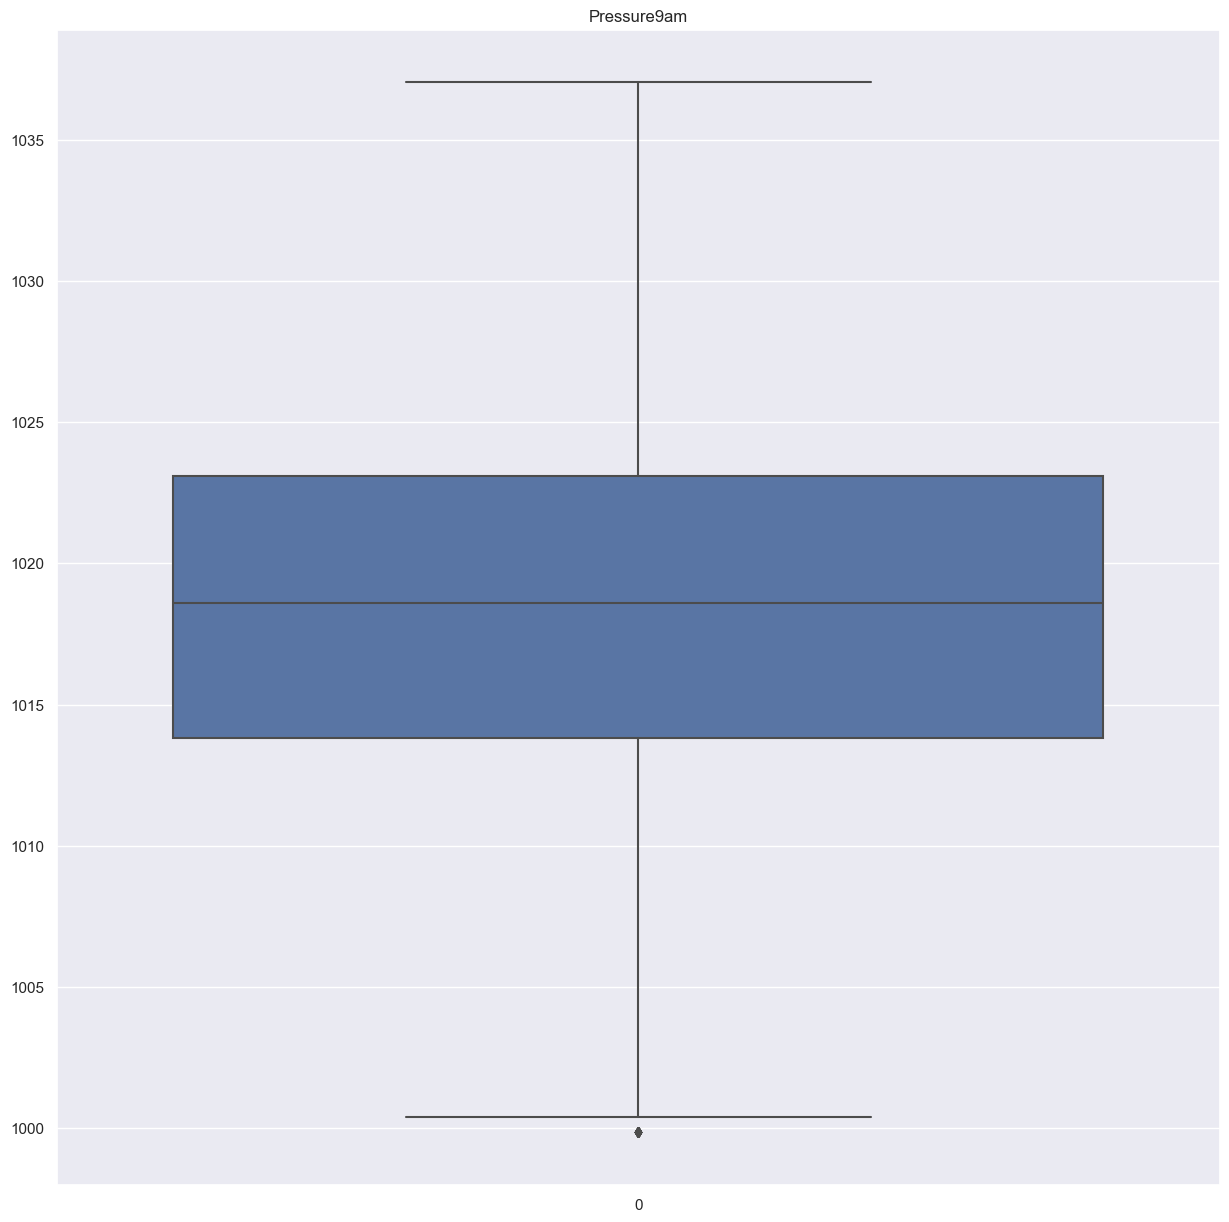

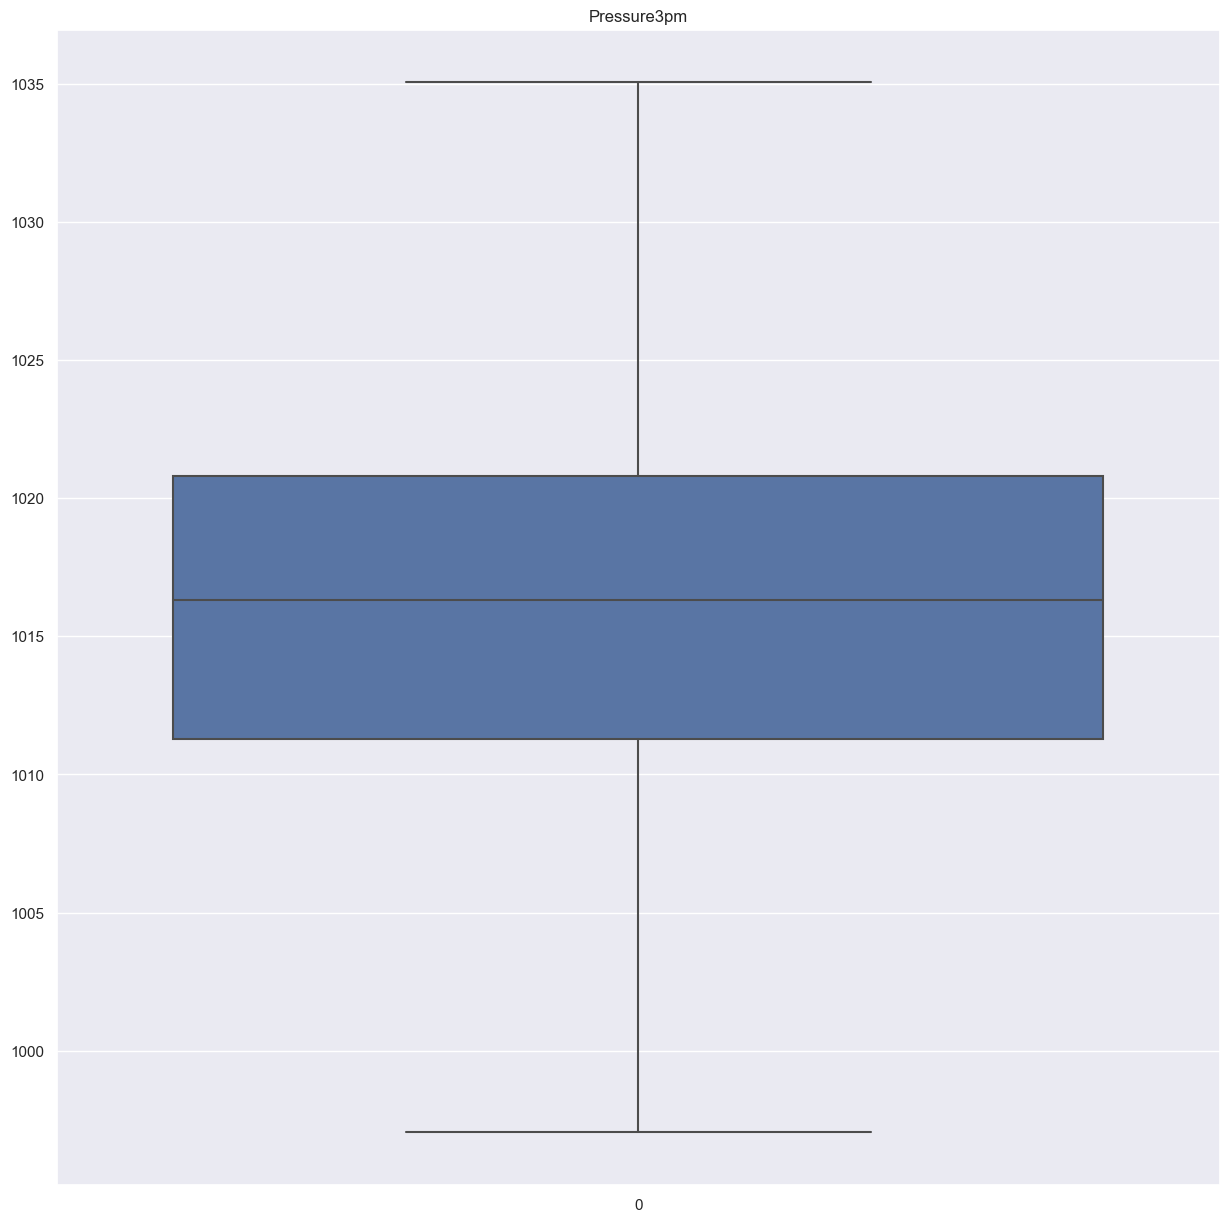

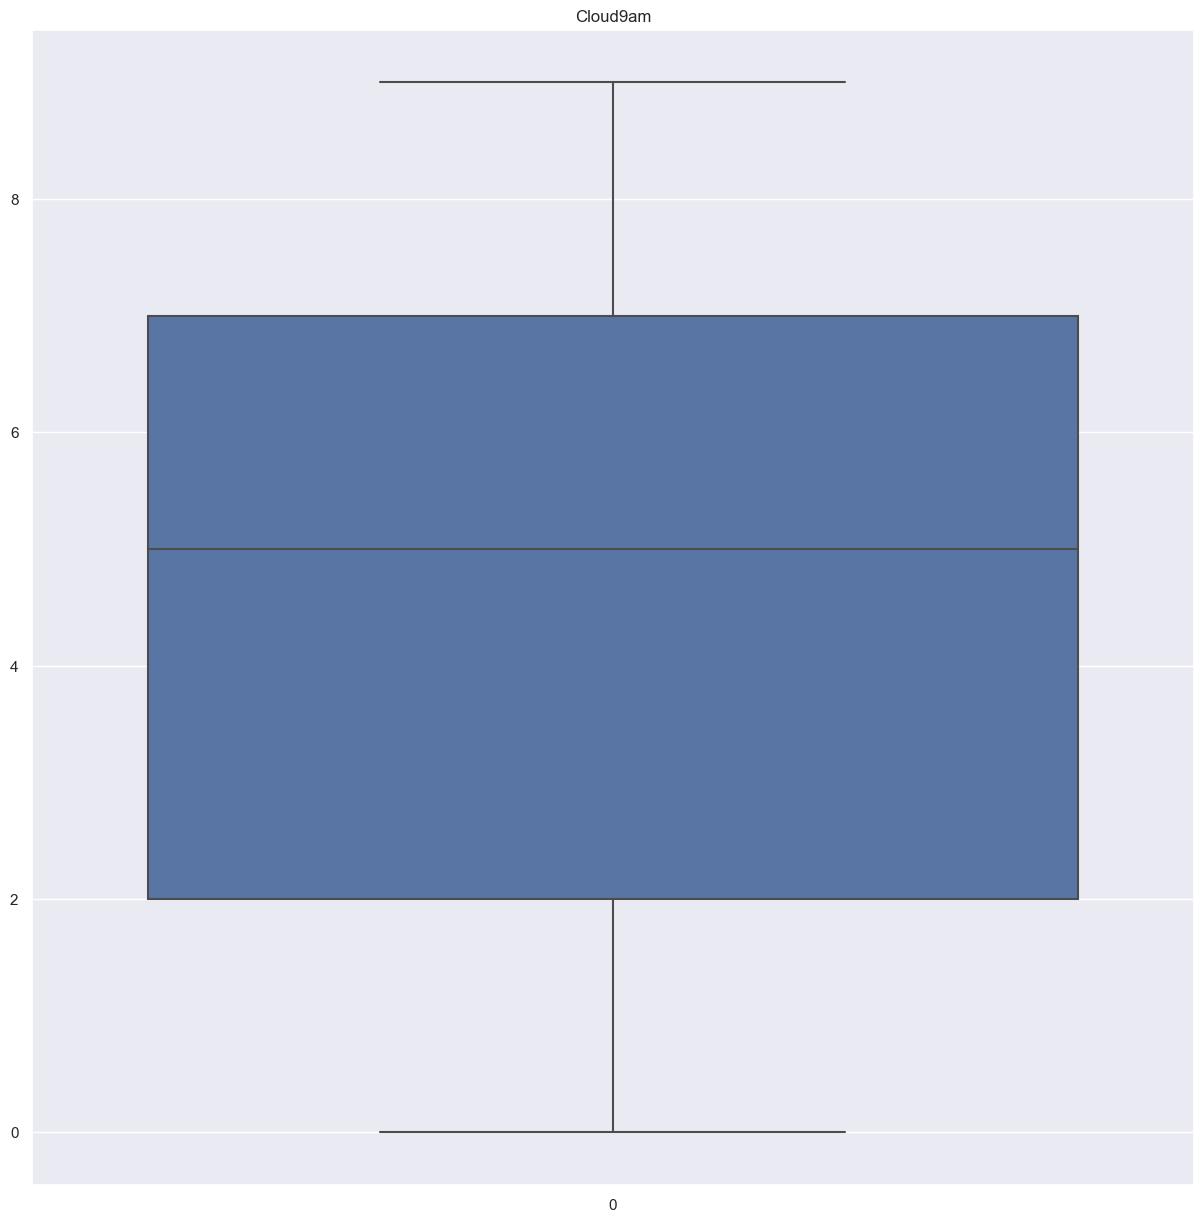

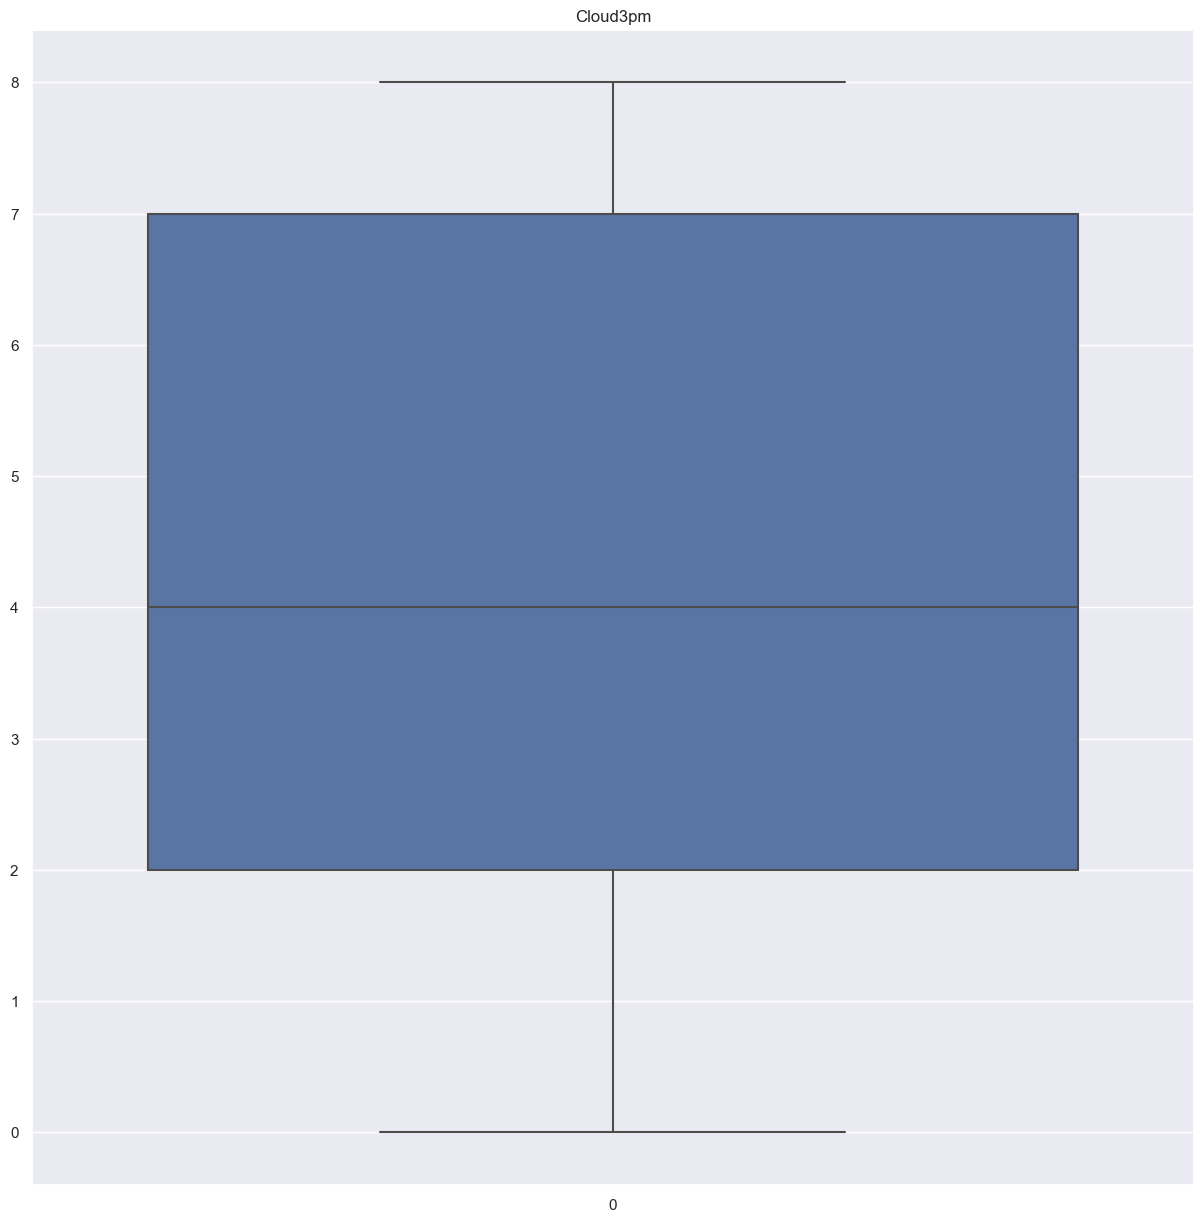

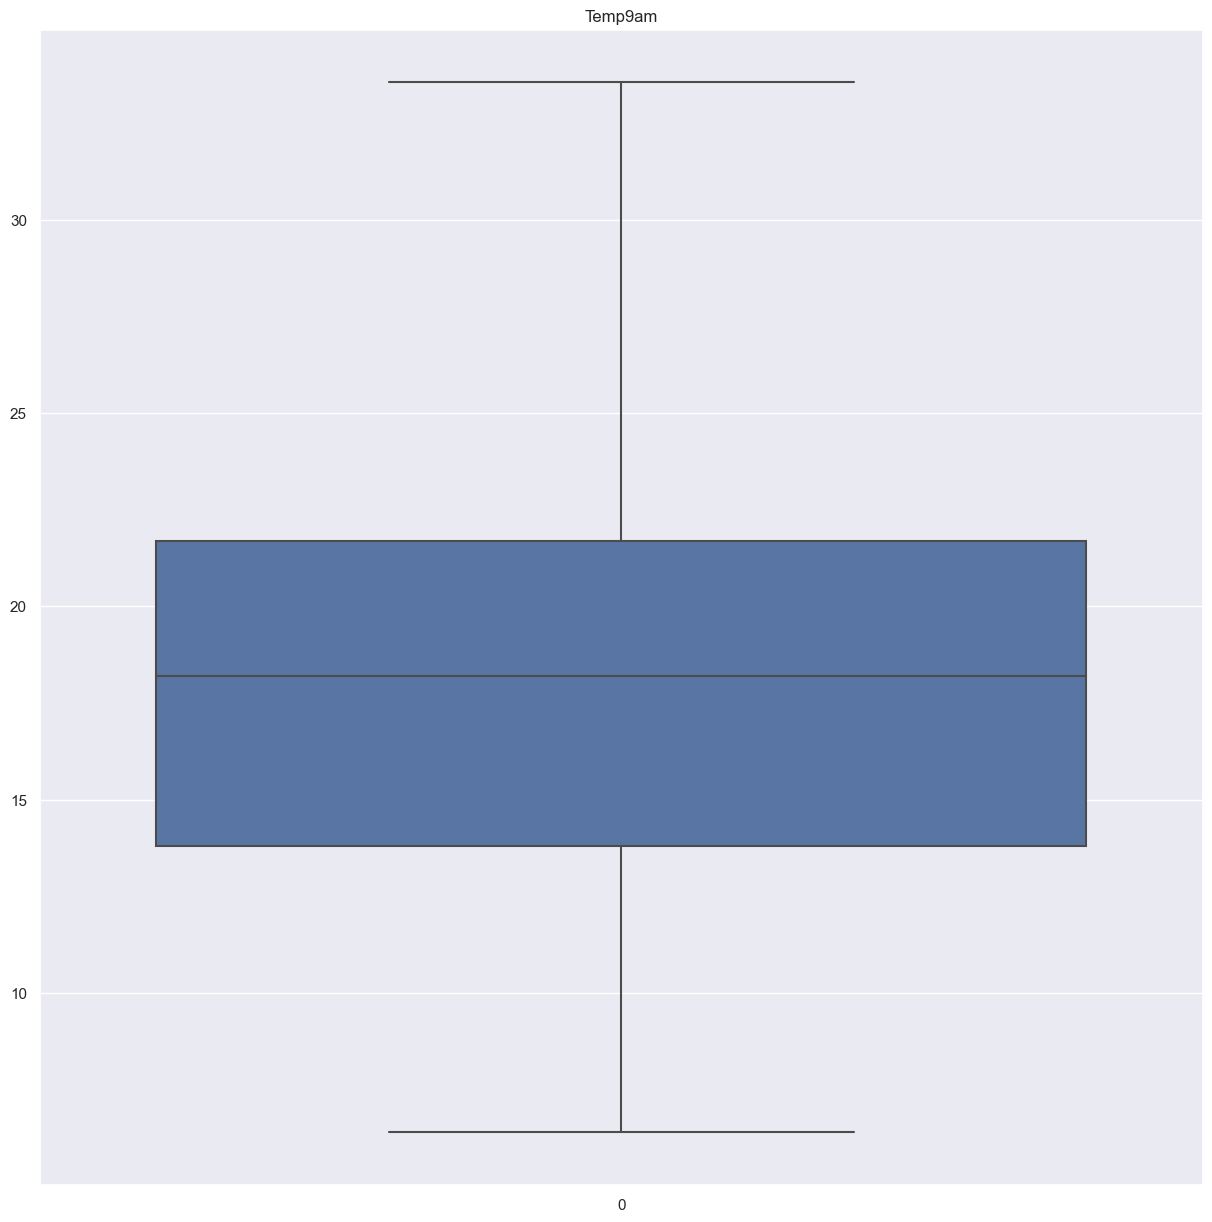

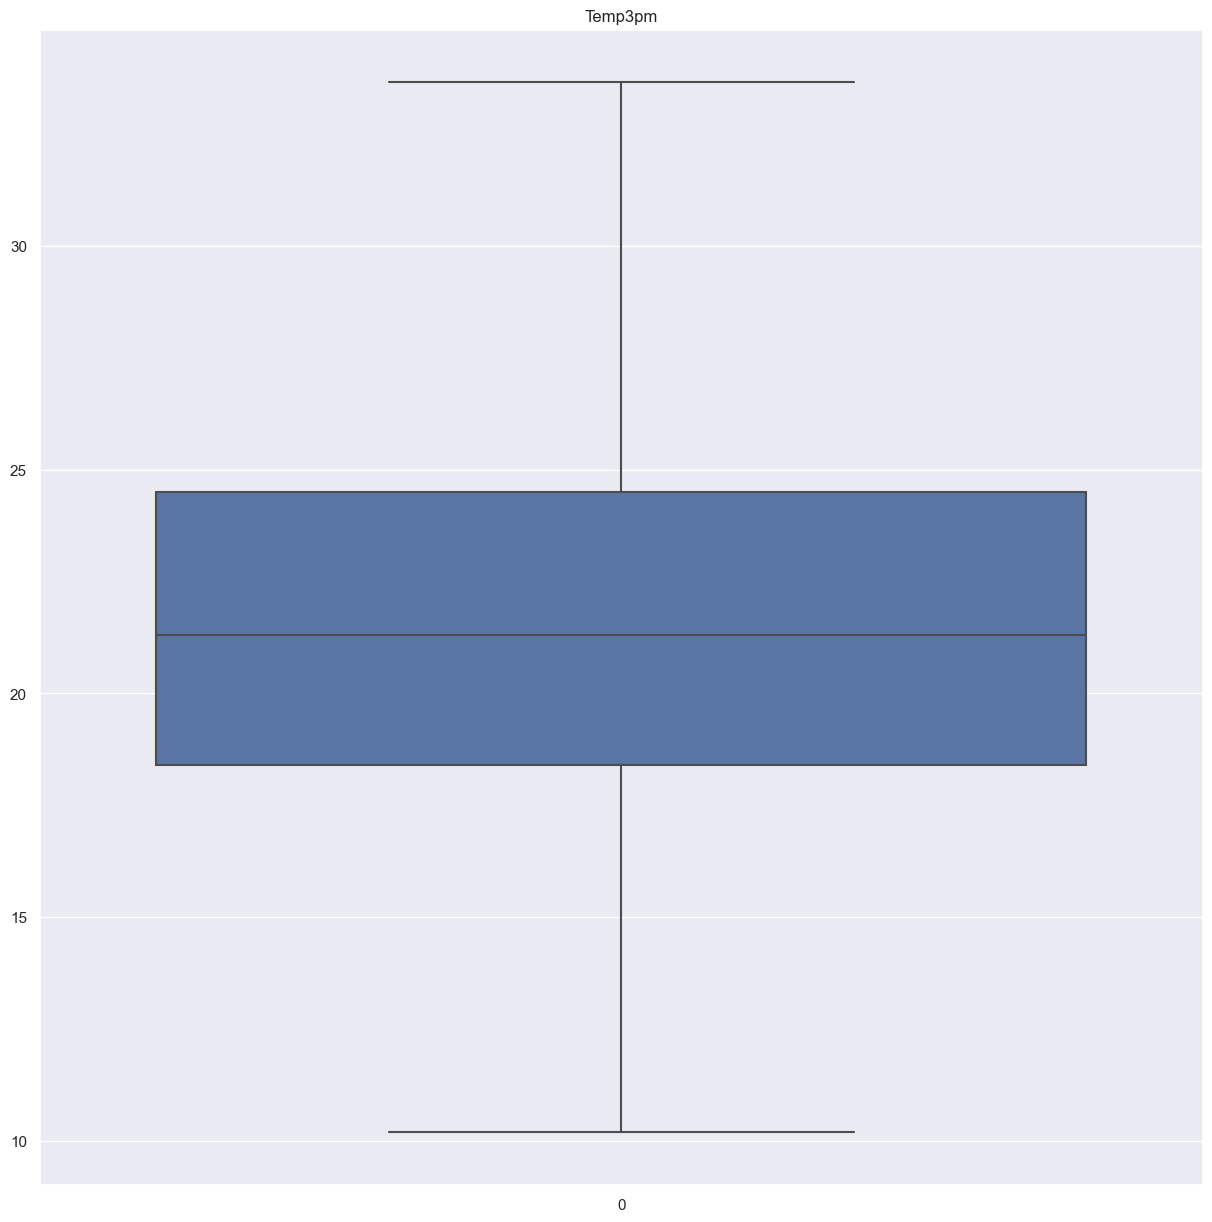

<Figure size 1500x1500 with 0 Axes>

In [34]:
# Clip the values of 'Temp3pm' column in the DataFrame 'df'
# Values greater than or equal to 33.65 will be set to 33.65
# Values less than or equal to 9.249 will be set to 9.249
df.loc[df['Temp3pm']>=33.65,'Temp3pm']=33.65
df.loc[df['Temp3pm']<=9.249,'Temp3pm']=9.249


# Loop through each numerical column and create a boxplot whether to identify any outlier after treatment
for feature in numerical_columns:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# Dummy variable 

In [35]:
# Use pd.get_dummies() to create dummy variables for categorical columns
# The drop_first=True parameter drops the first level of each categorical feature to avoid multicollinearity
df = pd.get_dummies(df,drop_first=True)

In [36]:
# To show first five rows of dataframe
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,2008-02-01,19.5,22.4,3.4999,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2008-02-02,19.5,25.6,3.4999,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2008-02-03,21.6,24.5,3.4999,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2008-02-04,20.2,22.8,3.4999,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2008-02-05,19.7,25.7,3.4999,4.8,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


# DATA VISUALISATION

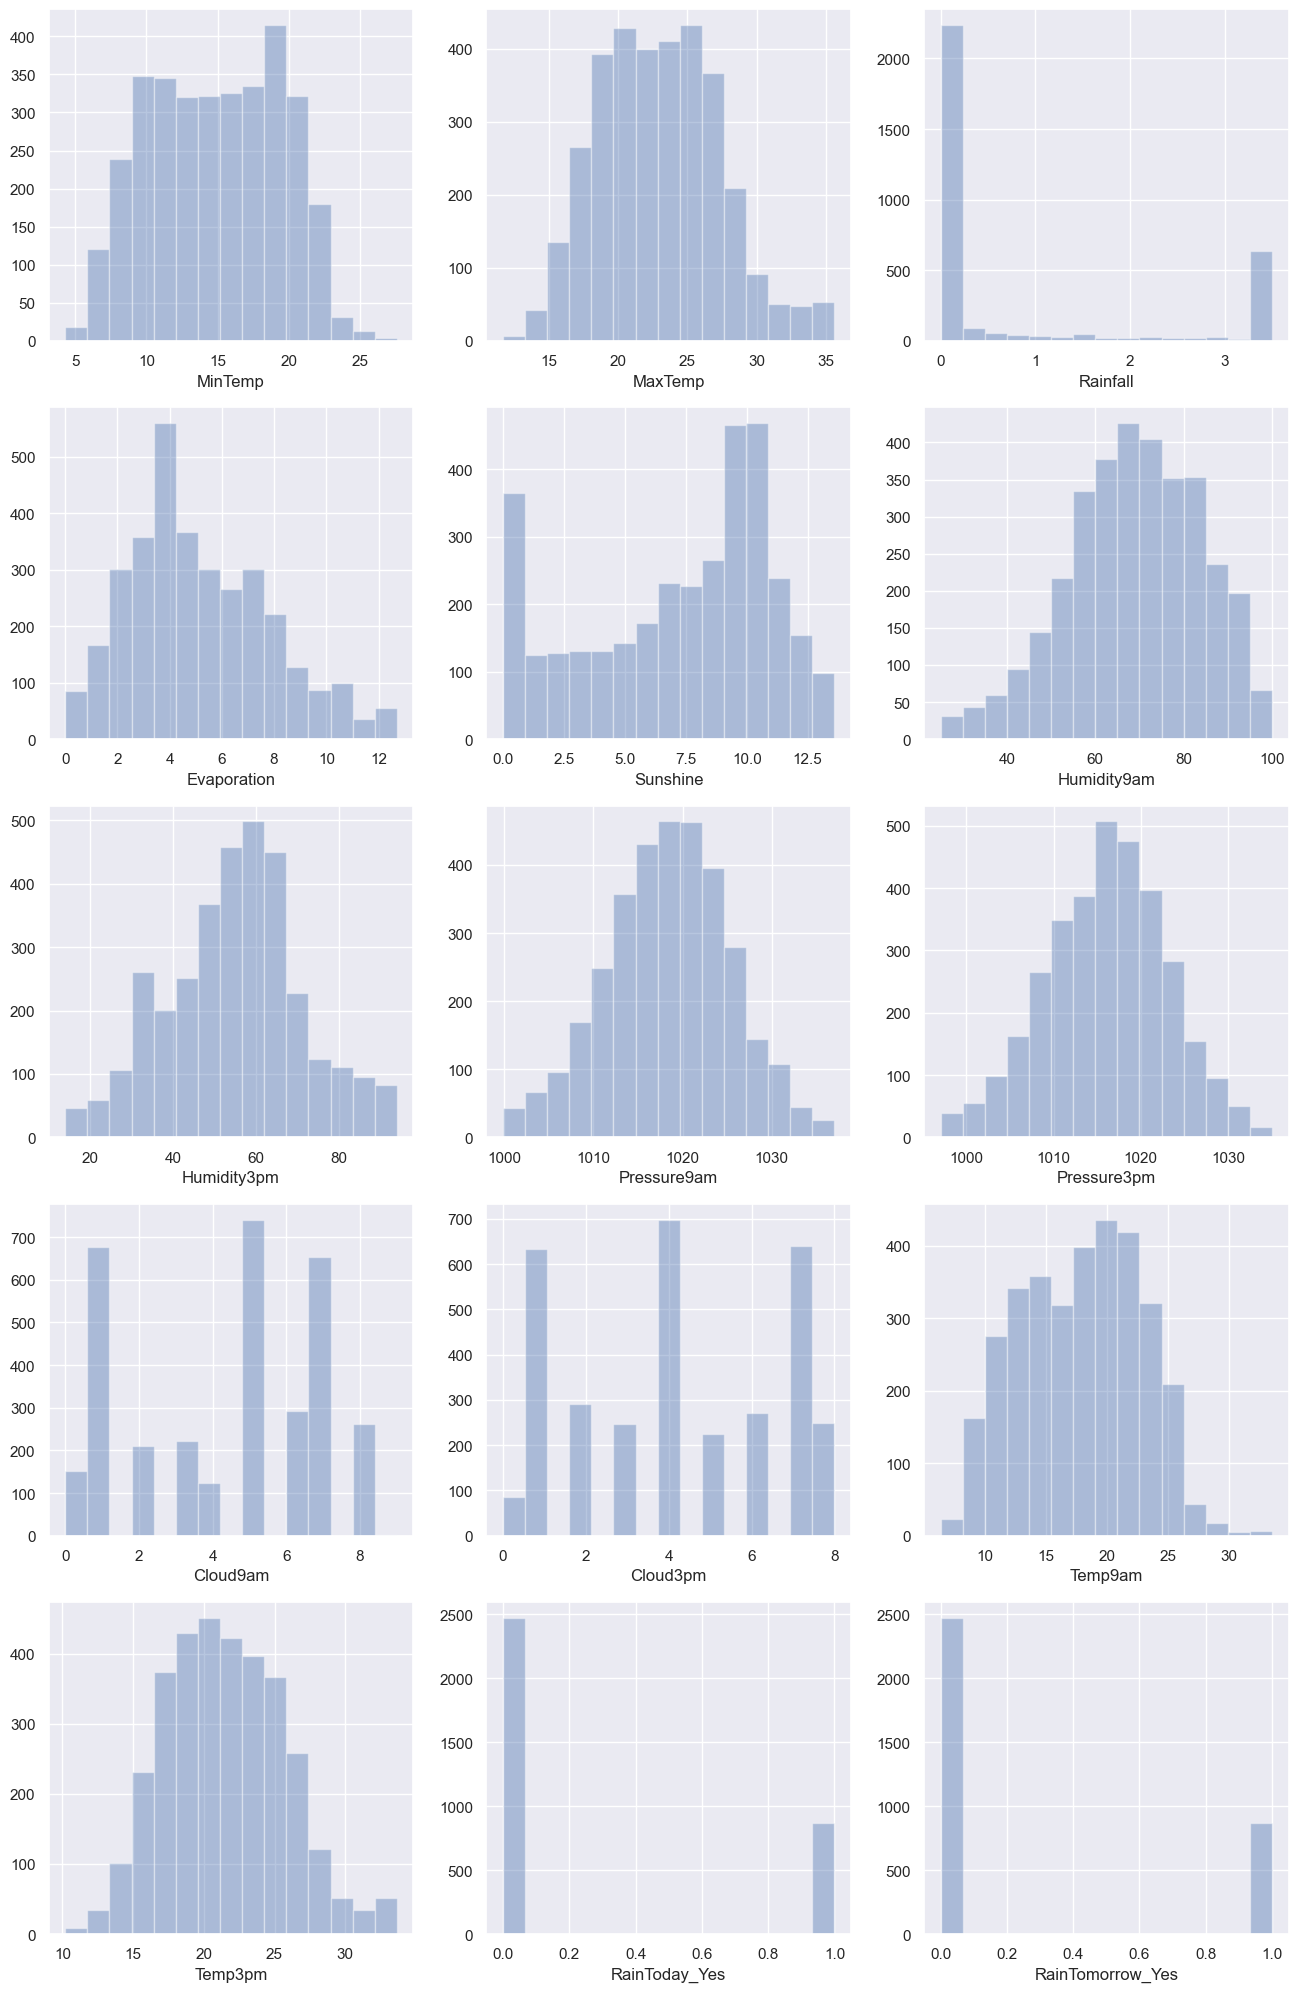

In [37]:
# Set the number of rows and columns for the subplot grid
n_rows=5
n_cols=3
# Create the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
# Set the size of the figure
fig.set_size_inches((16, 25))
# Select the columns from the original DataFrame that to plot
# In this case, columns 1 to 14 are selected
#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
# Loop through each column and plot the distribution using seaborn's distplot
for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 15)


Text(0.5, 1.0, 'Mean Rainfall over Years')

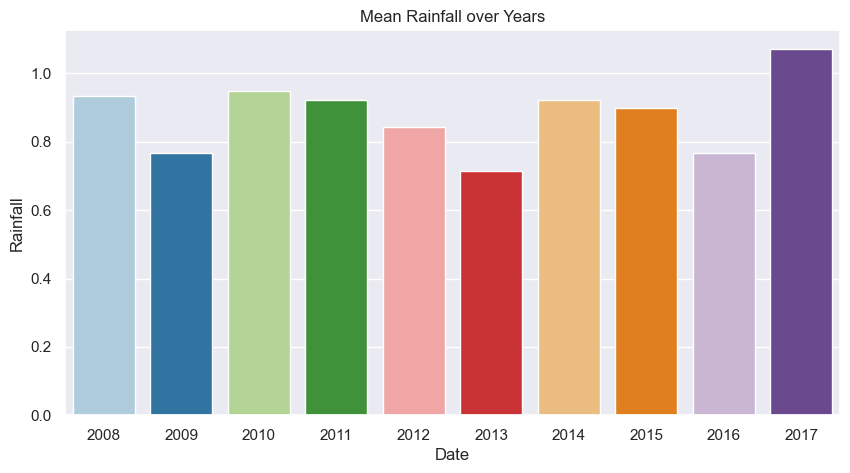

In [38]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Group the DataFrame by year and calculate the mean rainfall for each year
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()
# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))
# Create a bar plot using Seaborn
# x = RF_year.index: The years from the index of RF_year DataFrame (which is the years)
# y = RF_year: The mean rainfall values for each year
# palette = sns.color_palette("Paired"): The color palette for the bars
sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years")

Text(0.5, 1.0, 'Mean MinTemp over Years')

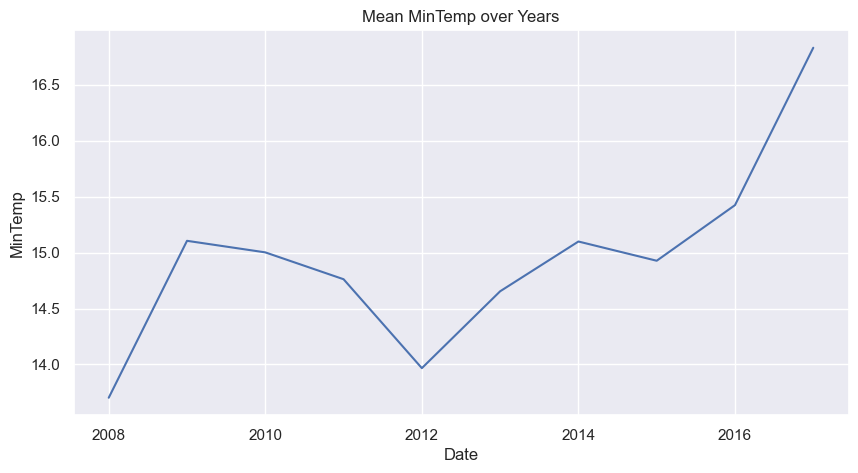

In [39]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Group the DataFrame by year and calculate the mean minimum temperature for each year
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()
# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))
# Create a line plot using Seaborn
# x = MinTemp_year.index: The years from the index of MinTemp_year DataFrame (which is the years)
# y = MinTemp_year: The mean minimum temperature values for each year
# palette = sns.color_palette("Paired"): The color palette for the line
sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years")

Text(0.5, 1.0, 'Mean Evaporation over Years')

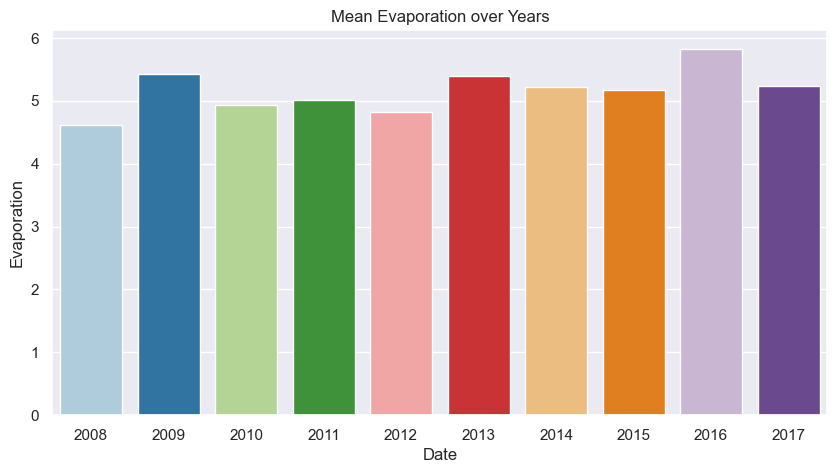

In [40]:
# Convert the 'Date' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Group the DataFrame by year and calculate the mean evaporation for each year
Ev_year = df.groupby(df['Date'].dt.year)['Evaporation'].mean()
# Set the size of the figure
fig = plt.gcf()
fig.set_size_inches((10, 5))
# Create a bar plot using Seaborn
# x = Ev_year.index: The years from the index of Ev_year DataFrame (which is the years)
# y = Ev_year: The mean evaporation values for each year
# palette = sns.color_palette("Paired"): The color palette for the bars
sns.barplot(x = Ev_year.index, y = Ev_year,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Evaporation over Years")

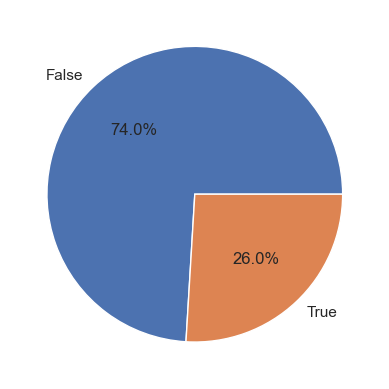

In [41]:
# Create a pie chart using matplotlib
# df['RainToday_Yes'].value_counts().values: Counts of unique values in the 'RainToday_Yes' column
# df['RainToday_Yes'].value_counts().index: Unique values in the 'RainToday_Yes' column
# autopct='%1.1f%%': Format for displaying the percentage on each slice
plt.pie(df['RainToday_Yes'].value_counts().values,
        labels = df['RainToday_Yes'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

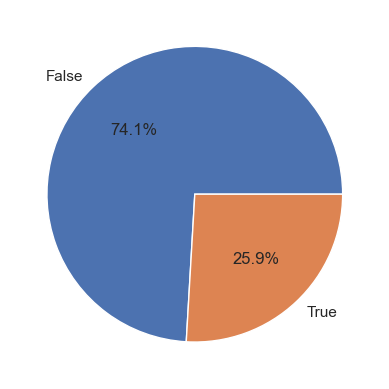

In [42]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
plt.pie(df['RainTomorrow_Yes'].value_counts().values,
        labels = df['RainTomorrow_Yes'].value_counts().index,
        autopct='%1.1f%%')
plt.show()


# RESAMPLE THE DATA TO AVOID CLASS IMBALACE

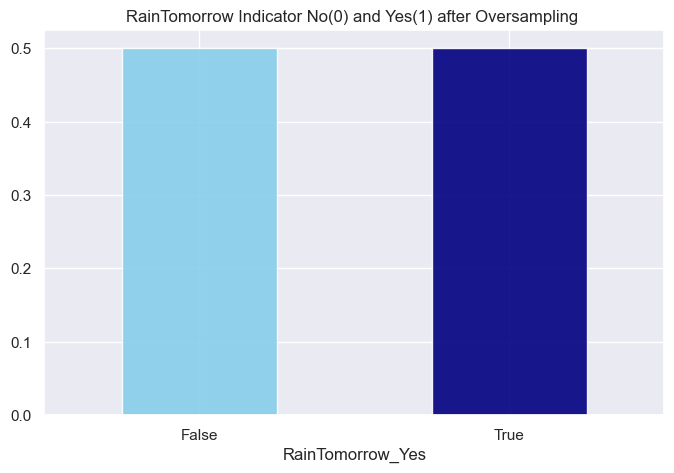

In [43]:
# Import necessary libraries
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'RainTomorrow_Yes' as the target variable

# Separate the majority ('No') and minority ('Yes') classes
no = df[df.RainTomorrow_Yes == 0]
yes = df[df.RainTomorrow_Yes == 1]

# Oversample the minority class ('Yes') to match the size of the majority class ('No')
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)

# Concatenate the oversampled 'Yes' class with the original 'No' class
df = pd.concat([no, yes_oversampled])

# Create a bar plot to show the distribution of 'RainTomorrow_Yes' classes after oversampling
fig = plt.figure(figsize=(8, 5))
df.RainTomorrow_Yes.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'navy'], alpha=0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()


# FEATURE SELECTION

SPILTING X AND Y ALSO

In [44]:
# X contains the feature columns (independent variables)
X = df.drop(['RainTomorrow_Yes','Date'], axis=1)

In [45]:
# Y contains the target column (dependent variable)
Y = df[['RainTomorrow_Yes']]

In [46]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes
9,14.6,24.2,3.4999,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,True
10,16.4,23.9,0.0000,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,False
13,16.9,24.3,3.0000,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,True
14,18.3,24.4,0.0000,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,False
15,16.7,24.1,0.0000,6.2,8.8,77.0,52.0,1023.0,1022.6,7.0,6.0,19.8,23.3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,10.0,16.7,3.4999,2.4,0.2,93.0,90.0,1016.3,1014.8,8.0,6.0,10.6,13.8,True
122,14.3,17.6,3.4999,1.8,0.1,97.0,90.0,1027.3,1024.8,8.0,7.0,15.3,17.1,True
2983,12.9,17.2,3.4999,6.4,1.6,85.0,86.0,1015.4,1016.5,7.0,7.0,14.9,14.6,True
2996,16.5,16.9,3.4999,2.4,0.0,91.0,90.0,1019.7,1018.4,8.0,8.0,16.7,16.2,True


In [47]:
Y

,RainTomorrow_Yes
9,False
10,False
13,False
14,False
15,False
...,...
1879,True
122,True
2983,True
2996,True


FEATURE SCALING

In [48]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
sc = StandardScaler()
# Use the fit_transform method of the StandardScaler to standardize the feature matrix X
X = sc.fit_transform(X)

In [49]:
X

array([[-0.1035885 ,  0.34707476,  1.54083384, ..., -0.12549809,
         0.506429  ,  1.39512176],
       [ 0.29914488,  0.28039411, -0.74918406, ...,  0.2290877 ,
         0.59891515, -0.71678332],
       [ 0.41101527,  0.36930164,  1.21374451, ...,  0.12479776,
         0.506429  ,  1.39512176],
       ...,
       [-0.4839478 , -1.2088071 ,  1.54083384, ..., -0.60523182,
        -1.5051447 ,  1.39512176],
       [ 0.32151896, -1.27548775,  1.54083384, ..., -0.22978803,
        -1.13520011,  1.39512176],
       [ 1.12698573,  0.54711671,  1.54083384, ...,  0.7505374 ,
         0.7607659 ,  1.39512176]])

# Model training

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [51]:
Y_test.shape

(989, 1)

In [52]:
X_train.shape

(3955, 14)

# Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression  
# Create an instance of the LogisticRegression model with random_state=0 for reproducibility
cl_lr = LogisticRegression(random_state=0) 
# Fit the logistic regression model to the training data
cl_lr.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [54]:
# Use the predict method of the logistic regression model to make predictions on the test data X_test
y_pred_lr = cl_lr.predict(X_test)

In [55]:
# Model evaluation on the basis of various performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)

# Print the evaluation metrics
print("Accuracy score for logistic regression:", accuracy_lr)
print("Precision score for logistic regression:", precision_lr)
print("Recall score for logistic regression:", recall_lr)


Accuracy score for logistic regression: 0.7745197168857432
Precision score for logistic regression: 0.7786885245901639
Recall score for logistic regression: 0.7676767676767676


<Axes: >

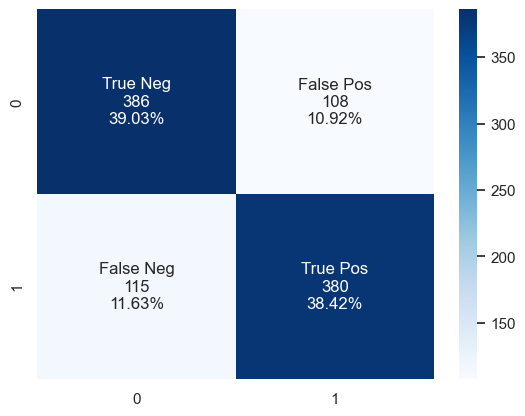

In [56]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cl_lr = confusion_matrix(Y_test, y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cl_lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cl_lr.flatten()/np.sum(cl_lr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cl_lr, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.7745266429476956


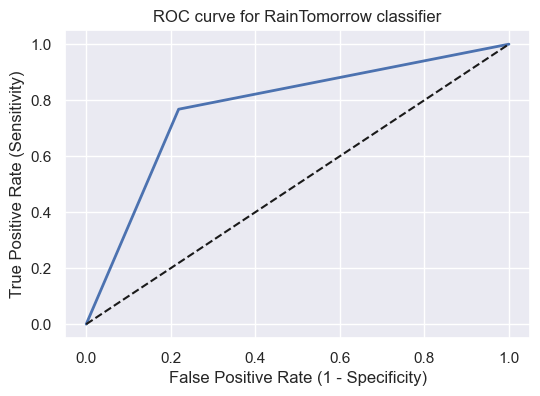

In [57]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve
# Print ROC score
roc_auc = roc_auc_score(Y_test, y_pred_lr)
print("Receiver_operating_characteristics_score:",roc_auc)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lr, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an instance of the Linear Discriminant Analysis (LDA) classifier
clf_lda = LinearDiscriminantAnalysis()

In [59]:
# Fit the LDA classifier to the training data
clf_lda.fit(X_test,Y_test)

LinearDiscriminantAnalysis()

In [60]:
# Make predictions on new data (X_test)
y_pred_lda = clf_lda.predict(X_test)


In [61]:
# Model Evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Calculate the accuracy score by comparing the true labels Y_test with the predicted labels y_pred_lr
accuracy_lda = accuracy_score(Y_test, y_pred_lda)
precision_score = precision_score(Y_test, y_pred_lda)
recall_score = recall_score(Y_test, y_pred_lda)
print("Accuracy score for LDA:",accuracy_lda)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:",recall_score)


Accuracy score for LDA: 0.7785642062689585
Precision score for LDA: 0.7804878048780488
Recall score for LDA: 0.7757575757575758


<Axes: >

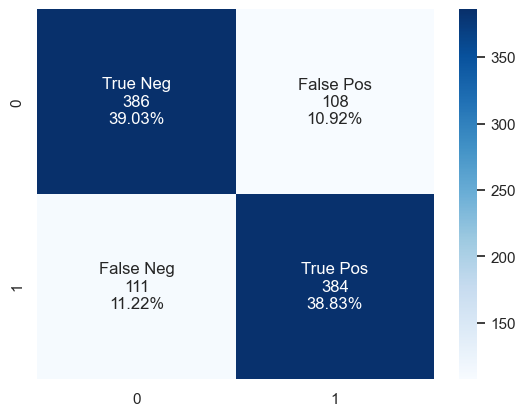

In [62]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
clf_lda = confusion_matrix(Y_test, y_pred_lda)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lda.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lda.flatten()/np.sum(clf_lda)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lda, annot=labels, fmt="", cmap='Blues')


Receiver_operating_characteristics_score: 0.7785670469880996


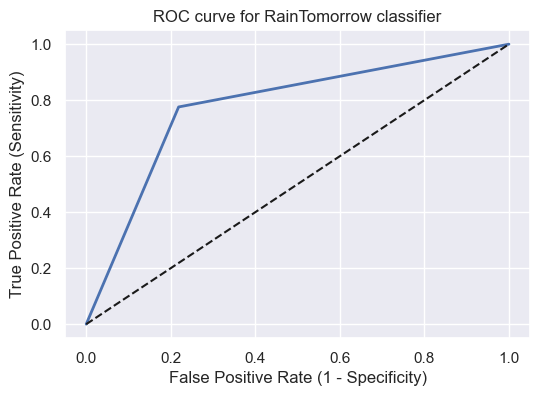

In [63]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve

#Print ROC score
roc_auc_lda = roc_auc_score(Y_test, y_pred_lda)
print("Receiver_operating_characteristics_score:",roc_auc_lda)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lda, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# KNN

In [64]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)

# Use the transform method of the scaler to standardize the training data X_train
X_train_s = scaler.transform(X_train)

# Create an instance of the StandardScaler and fit it to the test data X_test using the parameters learned from X_train
scaler = preprocessing.StandardScaler().fit(X_test)

# Use the transform method of the scaler to standardize the test data X_test
X_test_s = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the K-Nearest Neighbors (KNN) classifier with n_neighbors=1
clf_knn_1 = KNeighborsClassifier(n_neighbors = 1)

In [65]:
# Fit the KNN classifier to the training data
clf_knn_1.fit(X_train_s,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
# Make predictions on new data (X_test)
y_pred_knn = clf_knn_1.predict(X_test_s)
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Print performance metrics
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
precision_score = precision_score(Y_test, y_pred_knn)
recall_score = recall_score(Y_test, y_pred_knn)
print("Accuracy score for LDA:",accuracy_knn)
print("Precision score for LDA:", precision_score)
print("Recall score for LDA:",recall_score)

Accuracy score for LDA: 0.8837209302325582
Precision score for LDA: 0.8368794326241135
Recall score for LDA: 0.9535353535353536


<Axes: >

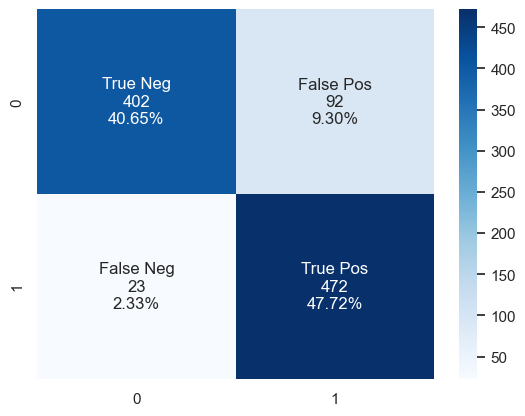

In [67]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
clf_knn_1 = confusion_matrix(Y_test, y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_knn_1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_knn_1.flatten()/np.sum(clf_knn_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_knn_1, annot=labels, fmt="", cmap='Blues')


Receiver_operating_characteristics_score: 0.8836502678607941


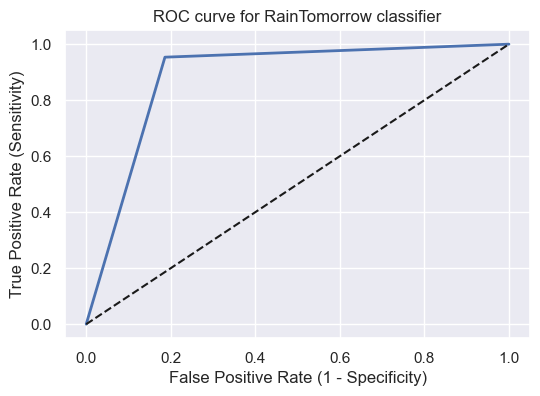

In [68]:
# plot ROC Curve
from sklearn.metrics import roc_auc_score, roc_curve


roc_auc_knn = roc_auc_score(Y_test, y_pred_knn)
print("Receiver_operating_characteristics_score:",roc_auc_knn)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn, drop_intermediate=False)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# RANDOM FOREST CLASSIFICATION


In [69]:
from sklearn import preprocessing
# Create an instance of the StandardScaler and fit it to the training data X_train
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
# Use the transform method of the scaler to standardize the test data X_test
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

In [70]:
# Fitting RandomForestClassifier to the model
from sklearn.ensemble import  RandomForestClassifier

clf_rfs = RandomForestClassifier(n_estimators=100, random_state=0)
clf_rfs.fit(X_train_s, Y_train)

RandomForestClassifier(random_state=0)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [71]:
# Assuming you have already defined and trained the classifier
# and X_test contains your test features
y_pred_rfs = clf_rfs.predict(X_test)


In [72]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Print Performance metrics
accuracy_rfs = accuracy_score(Y_test, y_pred_rfs)
precision_rfs = precision_score(Y_test, y_pred_rfs)
recall_rfs = recall_score(Y_test, y_pred_rfs)

print("Accuracy score for Random forest:", accuracy_rfs)
print("Precision score for Random forest:", precision_rfs)
print("Recall score for Random forest:", recall_rfs)

Accuracy score for Random forest: 0.9211324570273003
Precision score for Random forest: 0.8971428571428571
Recall score for Random forest: 0.9515151515151515


<Axes: >

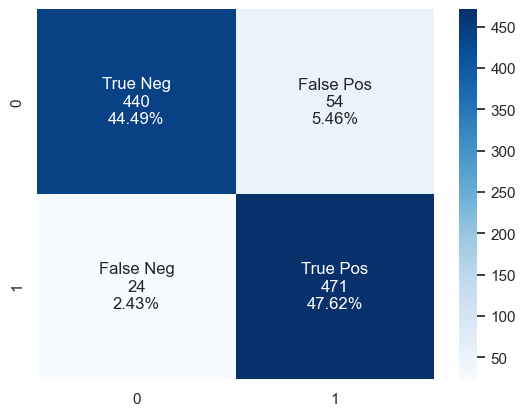

In [73]:
# Creating the Confusion matrix  
clf_rfs = confusion_matrix(Y_test, y_pred_rfs) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_rfs.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_rfs.flatten()/np.sum(clf_rfs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_rfs, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.9211017053122316


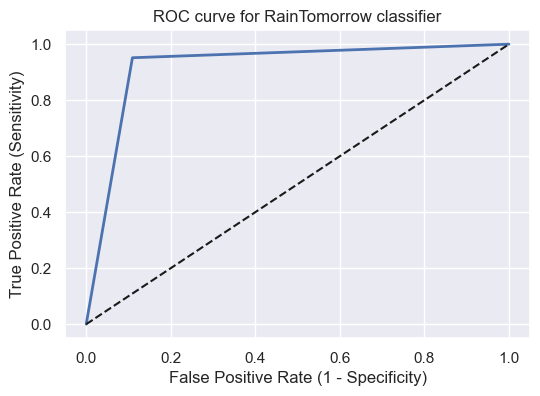

In [74]:
# Plot the ROC Curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_rfs, drop_intermediate=False)

roc_auc_rfs = roc_auc_score(Y_test, y_pred_rfs)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# GRID SEARCH

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

In [77]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

In [78]:
# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [79]:
# Get the best model
best_rf_model = grid_search.best_estimator_
# Make predictions on new data (X_test)
y_pred_best_rf = grid_search.predict(X_test)
# Use the best model to make predictions and evaluate
accuracy = best_rf_model.score(X_test, Y_test)
precision = precision_score(Y_test, y_pred_best_rf)
recall = recall_score(Y_test, y_pred_best_rf)
print("Best Model Accuracy:", accuracy)
print("Best Model Precision:",precision)
print("Best Model Recall:",recall)

Best Model Accuracy: 0.9282103134479271
Best Model Precision: 0.9
Best Model Recall: 0.9636363636363636


<Axes: >

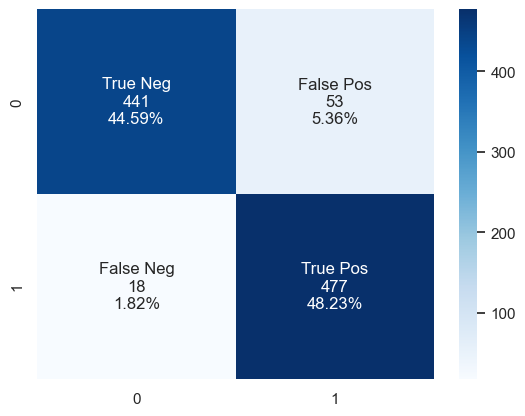

In [82]:
# Creating the Confusion matrix  
grid_search = confusion_matrix(Y_test, y_pred_best_rf) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                grid_search.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     grid_search.flatten()/np.sum(grid_search)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(grid_search, annot=labels, fmt="", cmap='Blues')


Receiver_operating_characteristics_score: 0.9281744571218256


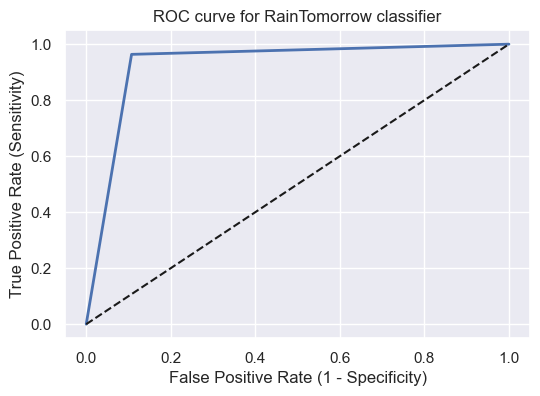

In [83]:
# Plot the ROC Curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_best_rf, drop_intermediate=False)

roc_auc_best_rf = roc_auc_score(Y_test, y_pred_best_rf)
print("Receiver_operating_characteristics_score:",roc_auc_best_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# XG BOOST CLASSIFICATION

In [86]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [87]:
# Create an XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,   # Number of boosting rounds (trees)
    max_depth=3,        # Maximum depth of each tree
    min_child_weight=1, # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,            # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,      # Subsample ratio of the training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    objective='binary:logistic',  # Binary classification
    nthread=-1,        # Number of parallel threads
    seed=42            # Random seed
)

In [89]:
# Train the XGBoost Classifier on the training data
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [90]:
# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

In [91]:
# Calculate accuracy
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.8008088978766431


# decision trees

In [92]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  

clf_dt = DecisionTreeClassifier(criterion='entropy', random_state=0)  
clf_dt.fit(X_train, Y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_dt = clf_dt.predict(X_test)

In [94]:
# Print the model performance metrics
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt)
recall_dt = recall_score(Y_test, y_pred_dt)

print("Accuracy score for Decision Tree:", accuracy_dt)
print("Precision score for Decision Tree:", precision_dt)
print("Recall score for Decision Tree:", recall_dt)


Accuracy score for Decision Tree: 0.8816986855409504
Precision score for Decision Tree: 0.8387096774193549
Recall score for Decision Tree: 0.9454545454545454


<Axes: >

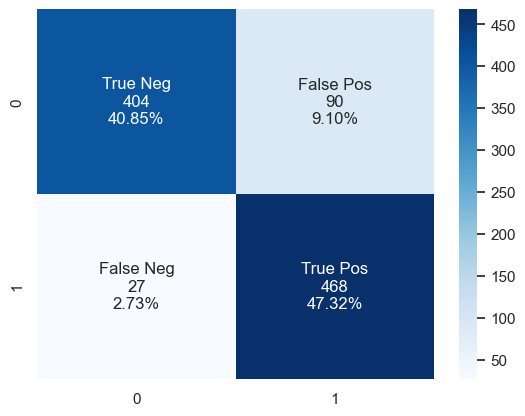

In [95]:
# Print the confusion matrix
clf_dt = confusion_matrix(Y_test, y_pred_dt) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_dt.flatten()/np.sum(clf_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_dt, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.8816341553183658


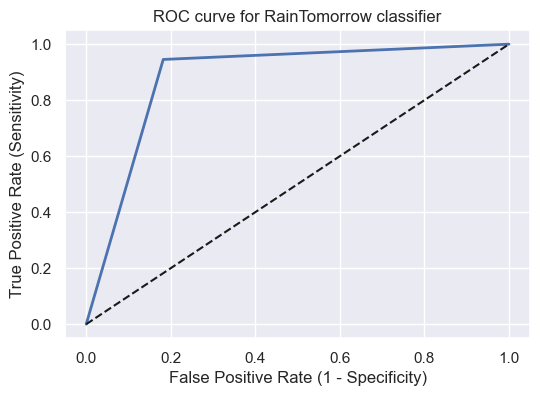

In [96]:
# Print ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dt, drop_intermediate=False)

roc_auc_dt = roc_auc_score(Y_test, y_pred_dt)
print("Receiver_operating_characteristics_score:",roc_auc_dt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# Light GBM

In [98]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 325.1 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.0/1.3 MB 326.8 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.3 MB 272.3 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.3 MB 385.0 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.3 MB 448.2 kB/s eta 0:00:03
   ---- -----------------------------------

In [102]:
# Fitting the Light GBM model for train data
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(random_state = 0)
clf_lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 1977, number of negative: 1978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1698
[LightGBM] [Info] Number of data points in the train set: 3955, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499874 -> initscore=-0.000506
[LightGBM] [Info] Start training from score -0.000506


LGBMClassifier(random_state=0)

In [103]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_lgbm = clf_lgbm.predict(X_test)

In [104]:
# Print Performance metrics for model evaluation
accuracy_lgbm = accuracy_score(Y_test, y_pred_lgbm)
precision_lgbm = precision_score(Y_test, y_pred_lgbm)
recall_lgbm = recall_score(Y_test, y_pred_lgbm)

print("Accuracy score for LightGBM:", accuracy_lgbm)
print("Precision score for LightGBM:", precision_lgbm)
print("Recall score for LightGBM:", recall_lgbm)

Accuracy score for LightGBM: 0.8918099089989889
Precision score for LightGBM: 0.8592592592592593
Recall score for LightGBM: 0.9373737373737374


<Axes: >

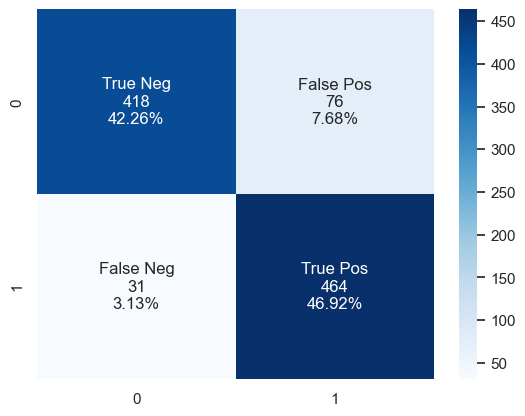

In [105]:
# Print the confusion matrix
clf_lgbm = confusion_matrix(Y_test, y_pred_lgbm)  
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_lgbm.flatten()/np.sum(clf_lgbm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_lgbm, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.8917637917637917


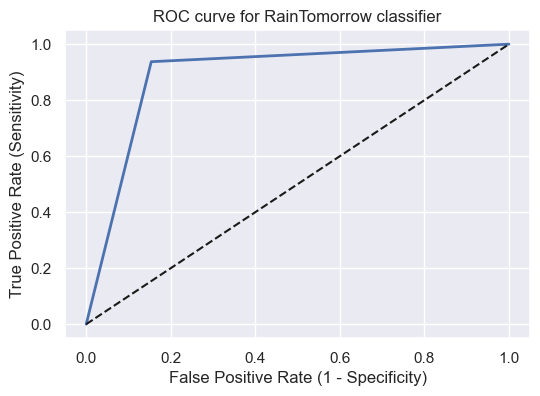

In [106]:
# Print the ROC curve and ROC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_lgbm, drop_intermediate=False)

roc_auc_rfs = roc_auc_score(Y_test, y_pred_lgbm)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# NAIVE BAYES

In [107]:
# Fitting the Naive Bayes model for train data
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)

GaussianNB()

In [108]:
# Use the trained Decision Tree classifier to make predictions on X_test
y_pred_nb = clf_nb.predict(X_test)


In [109]:
# Print the performance metrics for model evaluation
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
precision_nb = precision_score(Y_test, y_pred_nb)
recall_nb = recall_score(Y_test, y_pred_nb)

print("Accuracy score for Naive Bayes:", accuracy_nb)
print("Precision score for Naive Bayes:", precision_nb)
print("Recall score for Naive Bayes:", recall_nb)

Accuracy score for Naive Bayes: 0.7462082912032356
Precision score for Naive Bayes: 0.7510288065843621
Recall score for Naive Bayes: 0.7373737373737373


<Axes: >

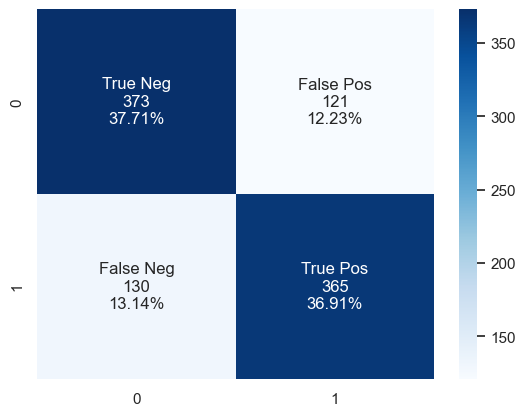

In [110]:
# Print the confusion matrix
clf_nb = confusion_matrix(Y_test, y_pred_nb) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                clf_nb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     clf_nb.flatten()/np.sum(clf_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(clf_nb, annot=labels, fmt="", cmap='Blues')

Receiver_operating_characteristics_score: 0.7462172330593384


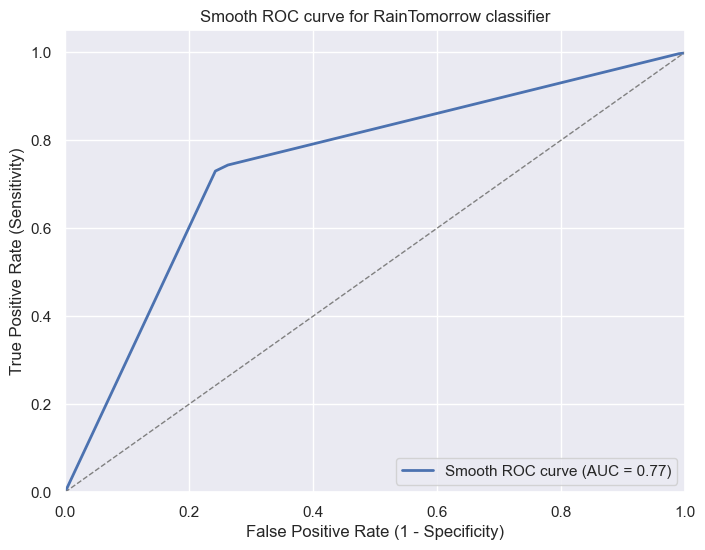

In [111]:
# Print ROC curve and ROC score
from scipy import interp
fpr, tpr, _ = roc_curve(Y_test, y_pred_nb)
mean_fpr = np.linspace(0, 2, 100)
mean_tpr = interp(mean_fpr, fpr, tpr)
roc_auc_rfs = roc_auc_score(Y_test, y_pred_nb)
print("Receiver_operating_characteristics_score:",roc_auc_rfs)

plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label='Smooth ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Smooth ROC curve for RainTomorrow classifier')
plt.legend(loc='lower right')
plt.show()

# 5 . MODEL SELECTION

In [113]:
# Create a dictionary containing the accuracy scores of different models
accuracy_dict = {"Logistic Regression": accuracy_lr,
                 "LDA": accuracy_lda,
                 "KNN": accuracy_knn,
                 "Random Forest": accuracy_rfs,
                 "Random Forest with grid search": accuracy,
                 "Decision Trees": accuracy_dt,
                 "LightGBM": accuracy_lgbm,
                 "Naive Bayes": accuracy_nb}
# Create a pandas DataFrame from the accuracy_dict with "Accuracy" as the column name
accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
Logistic Regression,0.774520
LDA,0.778564
KNN,0.883721
Random Forest,0.921132
Random Forest with grid search,0.928210
Decision Trees,0.881699
LightGBM,0.891810
Naive Bayes,0.746208


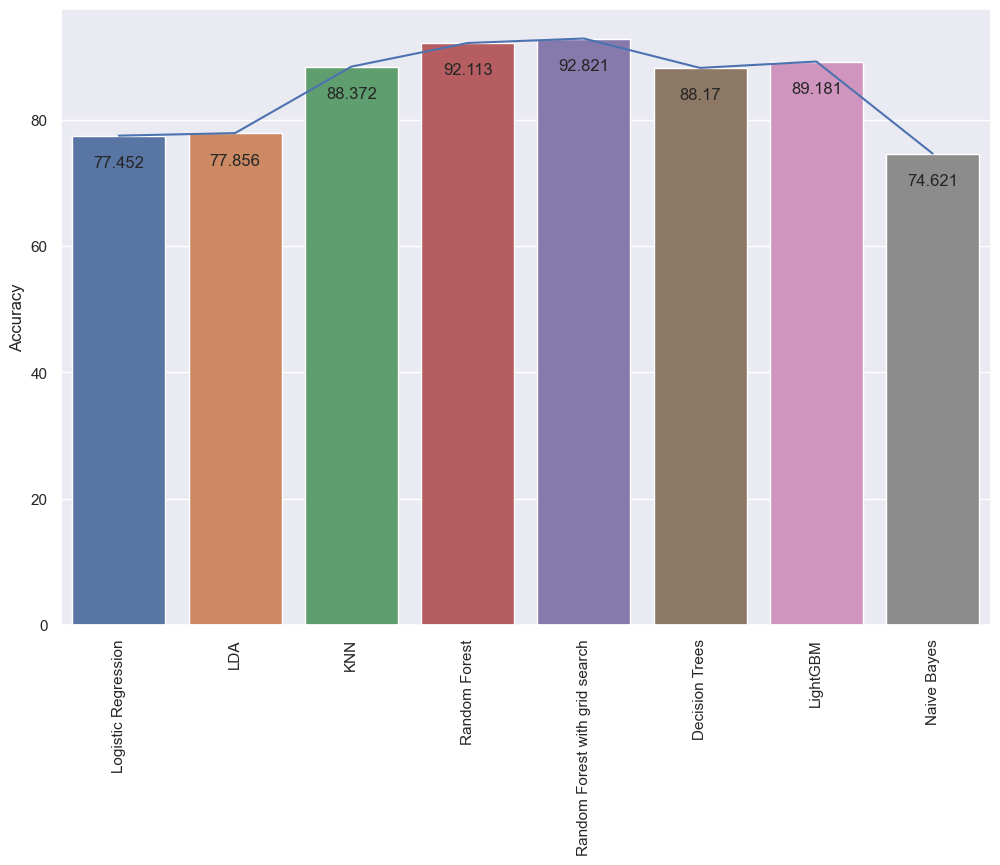

In [114]:
# Create Visualization for different model trained accuracy for comparison
fig = plt.gcf();
fig.set_size_inches(12, 8);

sns.lineplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);
sns.barplot(x = accuracy_df.index, y = accuracy_df.Accuracy*100);

for i, val in enumerate(accuracy_df.index):
    y = round(accuracy_df.loc[val].sum()*100, 3)
    plt.xticks(rotation=90)
    plt.text(i, y-5, str(y), ha = "center")

# Rainfall prediction

In [115]:
import pandas as pd
import pickle

In [116]:
input1 = [[12,4.4,12.8,0,2.2,6.1,8,22,8,7,77,50,1022.5,1019.5]]
input2 = [[2,15.9,21.7,2.2,5.6,10.0,13,7,15.0,13.0,89.0,91.0,1010.5,1004.2]]

In [117]:
prediction1 = best_rf_model.predict(input1) 

pred = int(prediction1[0])
if pred == 0:
    print("Tomorrow will be no Rain fall")
else:
    print("Tomorrow will be Rain fall")

Tomorrow will be Rain fall


In [118]:
prediction2 = best_rf_model.predict(input2) 
pred = int(prediction2[0])
if pred == 0:
    print("Tomorrow will be no Rain fall")
else:
    print("Tomorrow will be Rain fall")

Tomorrow will be Rain fall
